### Import libraries

In [1]:
import sys
sys.path.append("..")
import os
from model import old_model_1D, experimental_model, experimental2d_model, grapher
from data import batch_creator, loader, data_generation
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
print('How many observations? (deafult 150000)')
dataset_size = input()
print('Do you want to overwrite data? True/False')
rewrite = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = os.path.expanduser('~/Downloads/GPT_' + kernel)

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf
How many observations? (deafult 150000)
1
Do you want to overwrite data? True/False
False


In [3]:
data = loader.load_data(kernel, size = dataset_size, rewrite = rewrite.capitalize(), diff_x= True, noise = False, d = d, ordered = True, p=0.5)

['.DS_Store' 'em_te.npy' 'em_tr.npy' 'em_y_te.npy' 'em_y_tr.npy'
 'x_te.npy' 'x_tr.npy' 'y_te.npy' 'y_tr.npy']


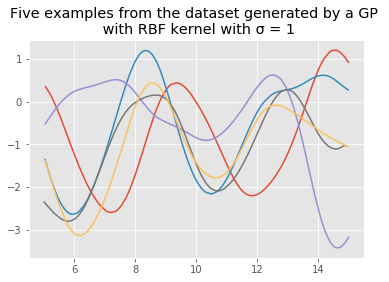

In [4]:
if d:
    plotter.plot_2d_examples(data[-3], data[-1], data[3])
else:
    plotter.plot_examples(data[5], data[-1])

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, RBF

In [6]:
N = 10000
seq_len = 200
t = np.linspace(5, 15, 200)
k = RBF()
gp = GaussianProcessRegressor(kernel=k)
k1 = WhiteKernel(0.05)
gp1 = GaussianProcessRegressor(kernel=k1)
y = gp.sample_y(t[:,None], N) + gp1.sample_y(t[:,None], N) 
y = y.T

In [21]:
t.shape

(200,)

In [22]:
y.shape

(10000, 200)

In [23]:
x.shape

(200, 1, 80)

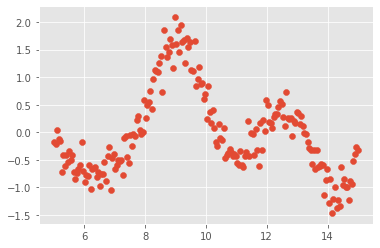

In [8]:
cmap = plt.get_cmap('Paired', 2)

fig,ax = plt.subplots()
ax.scatter(t, y[1], cmap=cmap)
plt.show()

In [9]:
def embed_position(t, d, TΔmin, Tmax):  # return.shape=(T,B,d)
    # t.shape=(T,B)   T=sequence_length, B=batch_size
    """A position-embedder, similar to the Attention paper, but tweaked to account for
    floating point positions, rather than integer.
    """
    R = Tmax / TΔmin * 100
    drange_even = TΔmin * R**(np.arange(0,d,2)/d)
    drange_odd = TΔmin * R**((np.arange(1,d,2) - 1)/d)
    x = np.concatenate([np.sin(t[:,:,None] / drange_even), np.cos(t[:,:,None] / drange_odd)], 2)
    return x

In [37]:
x = embed_position(t[:,None], d=80, TΔmin= 0.2, Tmax=30)

In [38]:
x.shape

(200, 1, 80)

In [39]:
batch_x = np.repeat(x.squeeze()[None, :, :], 64, axis =0)

In [40]:
batch_x.shape

(64, 200, 80)

In [45]:
train_step, test_step, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [46]:
# b_data = batch_creator.create_batch(em_x = data[1], em_y=data[3], x = data[5], y = data[-1], batch_s=20, d=d, chnge_context=False)
# b_data_te = b_data

In [47]:
# Uncomment the two lines below for one batch to overfit on
# np.random.seed(443)
# b_data, c = batch_creator.create_batch_2d(data[2], data[-3], data[-1], batch_s=20, em_2 = data[3])

### Training

Does not exist
Already exists
Initializing from scratch.


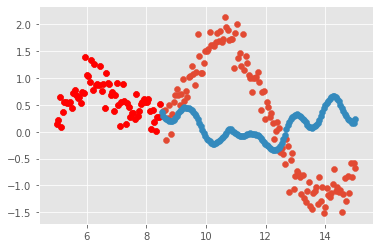

Epoch 0 batch 0 train Loss 0.5844 test Loss 0.5197 with training MSE metric 1.0769 and testing MSE metric 1.1411
learning rate is 0.0003000000142492354


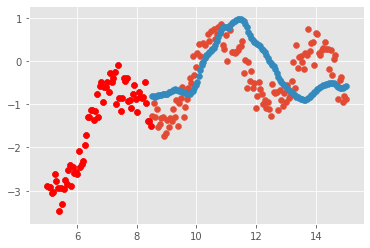

Epoch 0 batch 100 train Loss 0.2940 test Loss 0.2712 with training MSE metric 0.5849 and testing MSE metric 0.5873
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 105.93389511108398 secs



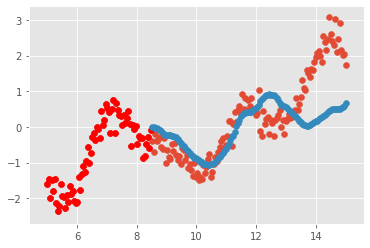

Epoch 1 batch 0 train Loss 0.2039 test Loss 0.1849 with training MSE metric 0.4342 and testing MSE metric 0.4419
learning rate is 0.0003000000142492354
Epoch 1 batch 100 train Loss 0.1236 test Loss 0.1158 with training MSE metric 0.3933 and testing MSE metric 0.3914
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 92.98672986030579 secs



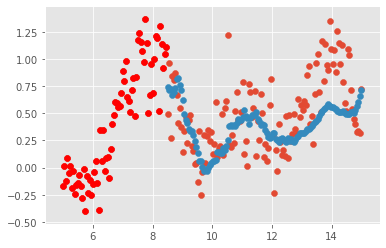

Epoch 2 batch 0 train Loss 0.0818 test Loss 0.0513 with training MSE metric 0.3267 and testing MSE metric 0.3161
learning rate is 0.0003000000142492354
Epoch 2 batch 100 train Loss -0.0155 test Loss -0.0679 with training MSE metric 0.2188 and testing MSE metric 0.1645
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 92.11686420440674 secs

Epoch 3 batch 0 train Loss -0.0379 test Loss -0.0841 with training MSE metric 0.1967 and testing MSE metric 0.1613
learning rate is 0.0003000000142492354
Epoch 3 batch 100 train Loss -0.1009 test Loss -0.1163 with training MSE metric 0.1494 and testing MSE metric 0.1438
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 91.5069420337677 secs



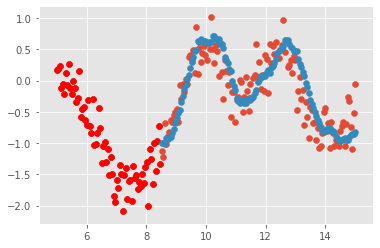

Epoch 4 batch 0 train Loss -0.0886 test Loss -0.1316 with training MSE metric 0.1398 and testing MSE metric 0.1150
learning rate is 0.0003000000142492354
Epoch 4 batch 100 train Loss -0.1361 test Loss -0.1524 with training MSE metric 0.1210 and testing MSE metric 0.1157
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 93.00810599327087 secs



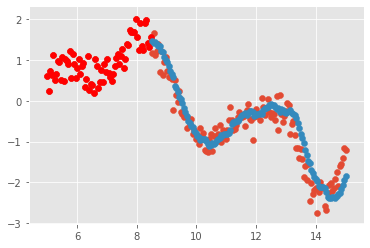

Epoch 5 batch 0 train Loss -0.1294 test Loss -0.1771 with training MSE metric 0.1185 and testing MSE metric 0.0934
learning rate is 0.0003000000142492354
Epoch 5 batch 100 train Loss -0.1663 test Loss -0.1846 with training MSE metric 0.1010 and testing MSE metric 0.0998
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 91.30448412895203 secs

Epoch 6 batch 0 train Loss -0.1844 test Loss -0.1799 with training MSE metric 0.0975 and testing MSE metric 0.1015
learning rate is 0.0003000000142492354
Epoch 6 batch 100 train Loss -0.2004 test Loss -0.2024 with training MSE metric 0.0867 and testing MSE metric 0.0885
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.30291295051575 secs



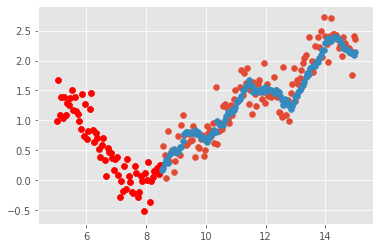

Epoch 7 batch 0 train Loss -0.1830 test Loss -0.1995 with training MSE metric 0.0913 and testing MSE metric 0.0838
learning rate is 0.0003000000142492354


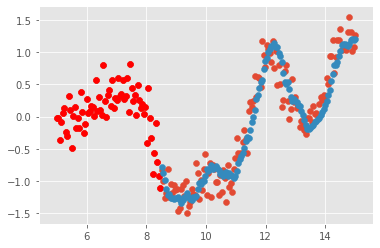

Epoch 7 batch 100 train Loss -0.1907 test Loss -0.2054 with training MSE metric 0.0868 and testing MSE metric 0.0808
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.96889090538025 secs

Epoch 8 batch 0 train Loss -0.2132 test Loss -0.2252 with training MSE metric 0.0804 and testing MSE metric 0.0763
learning rate is 0.0003000000142492354
Epoch 8 batch 100 train Loss -0.2333 test Loss -0.2364 with training MSE metric 0.0732 and testing MSE metric 0.0715
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.30095839500427 secs



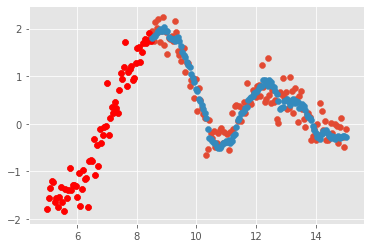

Epoch 9 batch 0 train Loss -0.1987 test Loss -0.2191 with training MSE metric 0.0838 and testing MSE metric 0.0768
learning rate is 0.0003000000142492354
Epoch 9 batch 100 train Loss -0.2318 test Loss -0.2374 with training MSE metric 0.0735 and testing MSE metric 0.0727
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.79100275039673 secs

Epoch 10 batch 0 train Loss -0.2364 test Loss -0.2523 with training MSE metric 0.0722 and testing MSE metric 0.0671
learning rate is 0.0003000000142492354
Epoch 10 batch 100 train Loss -0.2383 test Loss -0.2616 with training MSE metric 0.0718 and testing MSE metric 0.0644
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 88.64960527420044 secs

Epoch 11 batch 0 train Loss -0.2367 test Loss -0.2665 with training MSE metric 0.0726 and testing MSE metric 0.0638
learning rate is 0.0003000000142492354


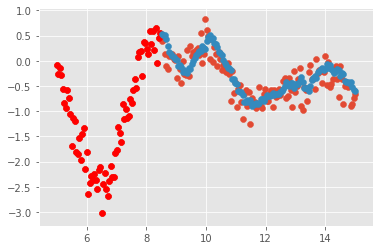

Epoch 11 batch 100 train Loss -0.2170 test Loss -0.2286 with training MSE metric 0.0778 and testing MSE metric 0.0739
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.66039705276489 secs

Epoch 12 batch 0 train Loss -0.2620 test Loss -0.2700 with training MSE metric 0.0649 and testing MSE metric 0.0629
learning rate is 0.0003000000142492354


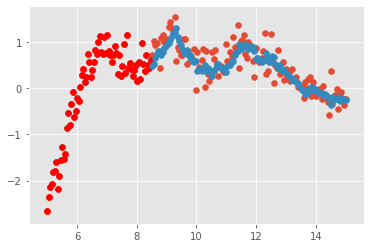

Epoch 12 batch 100 train Loss -0.2038 test Loss -0.2348 with training MSE metric 0.0817 and testing MSE metric 0.0720
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.00013589859009 secs

Epoch 13 batch 0 train Loss -0.2351 test Loss -0.2646 with training MSE metric 0.0731 and testing MSE metric 0.0644
learning rate is 0.0003000000142492354


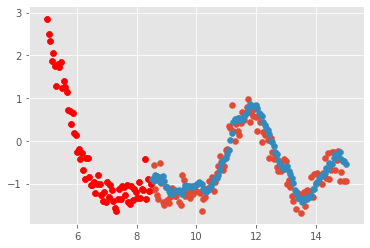

Epoch 13 batch 100 train Loss -0.1973 test Loss -0.2304 with training MSE metric 0.0841 and testing MSE metric 0.0730
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.73379302024841 secs



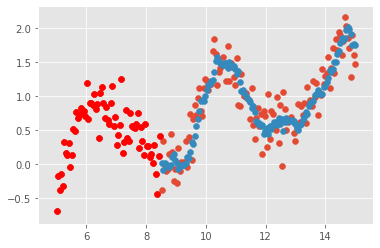

Epoch 14 batch 0 train Loss -0.2152 test Loss -0.2306 with training MSE metric 0.0784 and testing MSE metric 0.0734
learning rate is 0.0003000000142492354
Epoch 14 batch 100 train Loss -0.2635 test Loss -0.2615 with training MSE metric 0.0646 and testing MSE metric 0.0650
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.38822197914124 secs

Epoch 15 batch 0 train Loss -0.2505 test Loss -0.2673 with training MSE metric 0.0684 and testing MSE metric 0.0635
learning rate is 0.0003000000142492354
Epoch 15 batch 100 train Loss -0.2529 test Loss -0.2676 with training MSE metric 0.0676 and testing MSE metric 0.0636
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 89.54094505310059 secs

Epoch 16 batch 0 train Loss -0.2454 test Loss -0.2722 with training MSE metric 0.0703 and testing MSE metric 0.0622
learning rate is 0.0003000000142492354
Epoch 16 batch 100 train Loss -0.2560 test Loss -0.2738 with training MSE metric 0.0666 and testing MSE metric 0.0620
learnin

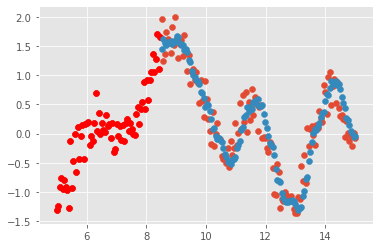

Epoch 17 batch 0 train Loss -0.2202 test Loss -0.2465 with training MSE metric 0.0767 and testing MSE metric 0.0689
learning rate is 0.0003000000142492354


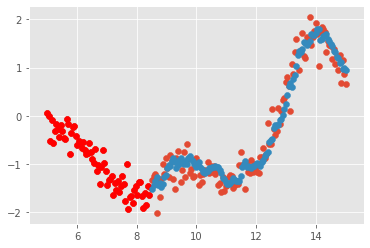

Epoch 17 batch 100 train Loss -0.2248 test Loss -0.2477 with training MSE metric 0.0757 and testing MSE metric 0.0684
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 90.52489900588989 secs

Epoch 18 batch 0 train Loss -0.2579 test Loss -0.2471 with training MSE metric 0.0668 and testing MSE metric 0.0693
learning rate is 0.0003000000142492354
Epoch 18 batch 100 train Loss -0.2661 test Loss -0.2700 with training MSE metric 0.0640 and testing MSE metric 0.0629
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 91.99802803993225 secs

Epoch 19 batch 0 train Loss -0.2684 test Loss -0.2705 with training MSE metric 0.0636 and testing MSE metric 0.0630
learning rate is 0.0003000000142492354
Epoch 19 batch 100 train Loss -0.2536 test Loss -0.2713 with training MSE metric 0.0673 and testing MSE metric 0.0626
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 96.37745380401611 secs



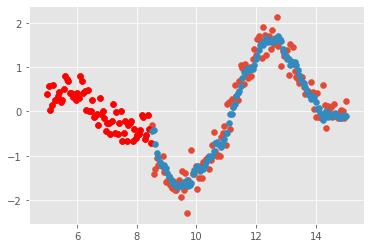

Epoch 20 batch 0 train Loss -0.2312 test Loss -0.2402 with training MSE metric 0.0735 and testing MSE metric 0.0706
learning rate is 0.0003000000142492354
Epoch 20 batch 100 train Loss -0.2488 test Loss -0.2578 with training MSE metric 0.0685 and testing MSE metric 0.0662
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 101.32121109962463 secs

Epoch 21 batch 0 train Loss -0.2607 test Loss -0.2738 with training MSE metric 0.0655 and testing MSE metric 0.0618
learning rate is 0.0003000000142492354
Epoch 21 batch 100 train Loss -0.2542 test Loss -0.2795 with training MSE metric 0.0673 and testing MSE metric 0.0604
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 96.7154290676117 secs



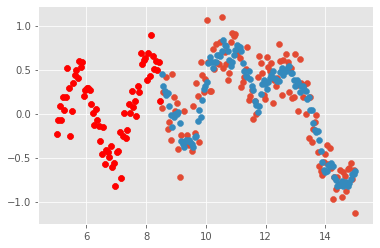

Epoch 22 batch 0 train Loss -0.2316 test Loss -0.2507 with training MSE metric 0.0734 and testing MSE metric 0.0678
learning rate is 0.0003000000142492354
Epoch 22 batch 100 train Loss -0.2592 test Loss -0.2679 with training MSE metric 0.0659 and testing MSE metric 0.0635
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 97.1850917339325 secs



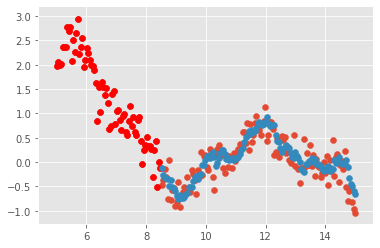

Epoch 23 batch 0 train Loss -0.2224 test Loss -0.2454 with training MSE metric 0.0761 and testing MSE metric 0.0692
learning rate is 0.0003000000142492354


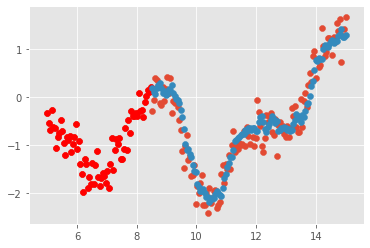

Epoch 23 batch 100 train Loss -0.2258 test Loss -0.2491 with training MSE metric 0.0751 and testing MSE metric 0.0681
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 104.65666198730469 secs

Epoch 24 batch 0 train Loss -0.2527 test Loss -0.2733 with training MSE metric 0.0675 and testing MSE metric 0.0623
learning rate is 0.0003000000142492354
Epoch 24 batch 100 train Loss -0.2504 test Loss -0.2695 with training MSE metric 0.0681 and testing MSE metric 0.0631
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 113.49179315567017 secs



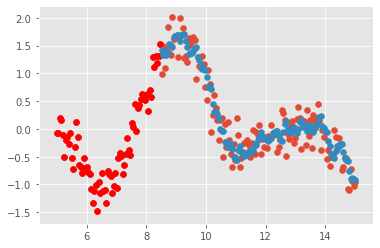

Epoch 25 batch 0 train Loss -0.2262 test Loss -0.2477 with training MSE metric 0.0750 and testing MSE metric 0.0685
learning rate is 0.0003000000142492354
Epoch 25 batch 100 train Loss -0.2630 test Loss -0.2700 with training MSE metric 0.0649 and testing MSE metric 0.0629
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 113.43130493164062 secs



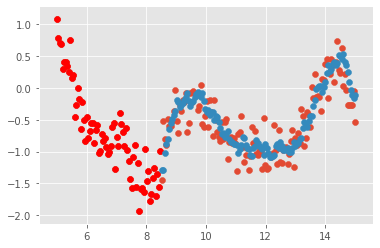

Epoch 26 batch 0 train Loss -0.2295 test Loss -0.2379 with training MSE metric 0.0742 and testing MSE metric 0.0715
learning rate is 0.0003000000142492354


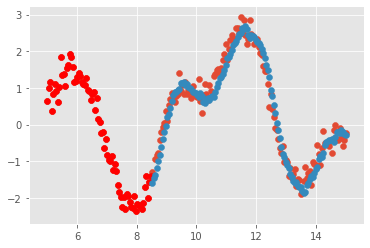

Epoch 26 batch 100 train Loss -0.2343 test Loss -0.2339 with training MSE metric 0.0723 and testing MSE metric 0.0724
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 109.19310784339905 secs



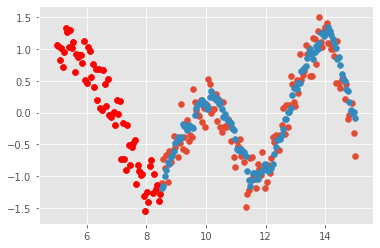

Epoch 27 batch 0 train Loss -0.2351 test Loss -0.2510 with training MSE metric 0.0723 and testing MSE metric 0.0676
learning rate is 0.0003000000142492354
Epoch 27 batch 100 train Loss -0.2631 test Loss -0.2765 with training MSE metric 0.0650 and testing MSE metric 0.0615
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 68.3966019153595 secs



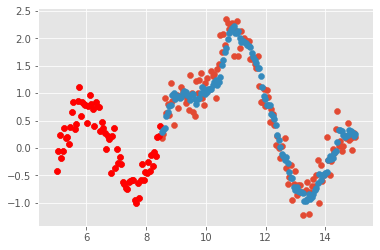

Epoch 28 batch 0 train Loss -0.2281 test Loss -0.2377 with training MSE metric 0.0744 and testing MSE metric 0.0715
learning rate is 0.0003000000142492354
Epoch 28 batch 100 train Loss -0.2568 test Loss -0.2753 with training MSE metric 0.0668 and testing MSE metric 0.0616
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 65.67352819442749 secs



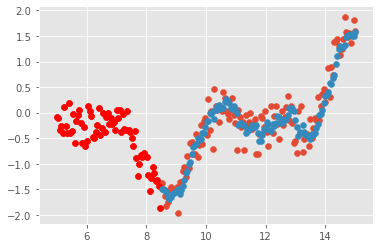

Epoch 29 batch 0 train Loss -0.2309 test Loss -0.2438 with training MSE metric 0.0738 and testing MSE metric 0.0700
learning rate is 0.0003000000142492354


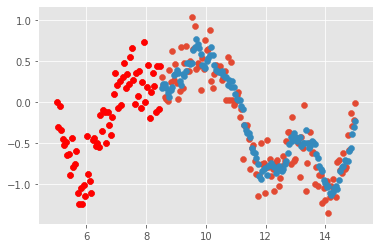

Epoch 29 batch 100 train Loss -0.2363 test Loss -0.2437 with training MSE metric 0.0720 and testing MSE metric 0.0698
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 65.16748785972595 secs

Epoch 30 batch 0 train Loss -0.2549 test Loss -0.2635 with training MSE metric 0.0672 and testing MSE metric 0.0647
learning rate is 0.0003000000142492354


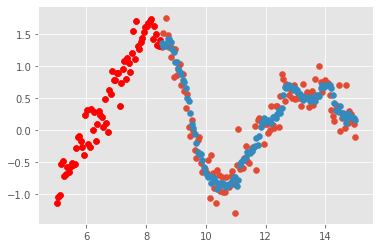

Epoch 30 batch 100 train Loss -0.2410 test Loss -0.2505 with training MSE metric 0.0707 and testing MSE metric 0.0679
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 79.51026511192322 secs

Epoch 31 batch 0 train Loss -0.2638 test Loss -0.2665 with training MSE metric 0.0650 and testing MSE metric 0.0641
learning rate is 0.0003000000142492354
Epoch 31 batch 100 train Loss -0.2658 test Loss -0.2680 with training MSE metric 0.0642 and testing MSE metric 0.0636
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 81.66319704055786 secs



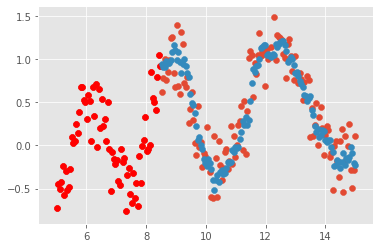

Epoch 32 batch 0 train Loss -0.2291 test Loss -0.2507 with training MSE metric 0.0740 and testing MSE metric 0.0679
learning rate is 0.0003000000142492354
Epoch 32 batch 100 train Loss -0.2640 test Loss -0.2633 with training MSE metric 0.0644 and testing MSE metric 0.0647
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 70.62631821632385 secs

Epoch 33 batch 0 train Loss -0.2617 test Loss -0.2631 with training MSE metric 0.0652 and testing MSE metric 0.0648
learning rate is 0.0003000000142492354


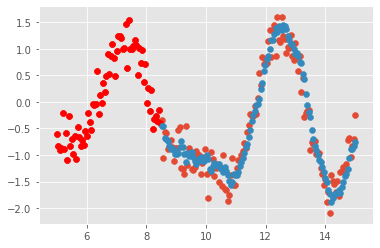

Epoch 33 batch 100 train Loss -0.2372 test Loss -0.2478 with training MSE metric 0.0718 and testing MSE metric 0.0687
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 66.23728775978088 secs



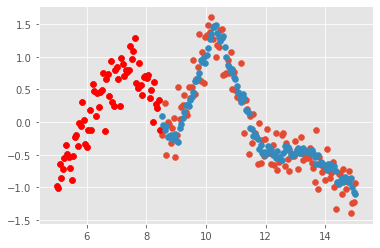

Epoch 34 batch 0 train Loss -0.2391 test Loss -0.2524 with training MSE metric 0.0712 and testing MSE metric 0.0675
learning rate is 0.0003000000142492354


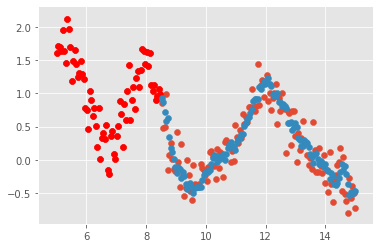

Epoch 34 batch 100 train Loss -0.2335 test Loss -0.2357 with training MSE metric 0.0729 and testing MSE metric 0.0721
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 65.49231886863708 secs

Epoch 35 batch 0 train Loss -0.2649 test Loss -0.2705 with training MSE metric 0.0646 and testing MSE metric 0.0629
learning rate is 0.0003000000142492354


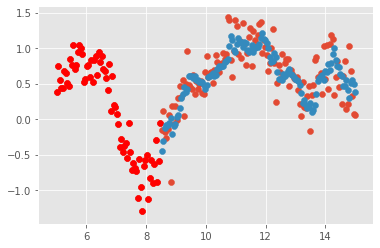

Epoch 35 batch 100 train Loss -0.2338 test Loss -0.2474 with training MSE metric 0.0726 and testing MSE metric 0.0687
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 66.75722479820251 secs



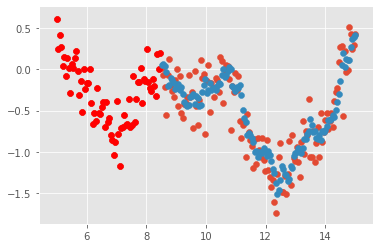

Epoch 36 batch 0 train Loss -0.2340 test Loss -0.2468 with training MSE metric 0.0725 and testing MSE metric 0.0689
learning rate is 0.0003000000142492354
Epoch 36 batch 100 train Loss -0.2717 test Loss -0.2656 with training MSE metric 0.0626 and testing MSE metric 0.0640
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 70.23933792114258 secs

Epoch 37 batch 0 train Loss -0.2530 test Loss -0.2778 with training MSE metric 0.0671 and testing MSE metric 0.0610
learning rate is 0.0003000000142492354
Epoch 37 batch 100 train Loss -0.2637 test Loss -0.2736 with training MSE metric 0.0646 and testing MSE metric 0.0621
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 68.05019807815552 secs

Epoch 38 batch 0 train Loss -0.2664 test Loss -0.2703 with training MSE metric 0.0638 and testing MSE metric 0.0630
learning rate is 0.0003000000142492354
Epoch 38 batch 100 train Loss -0.2558 test Loss -0.2707 with training MSE metric 0.0668 and testing MSE metric 0.0629
learnin

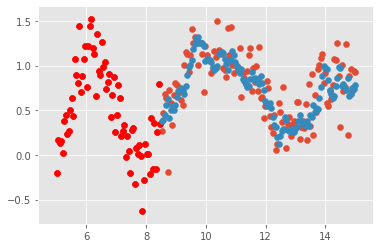

Epoch 40 batch 100 train Loss -0.2410 test Loss -0.2418 with training MSE metric 0.0706 and testing MSE metric 0.0703
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 66.23249983787537 secs



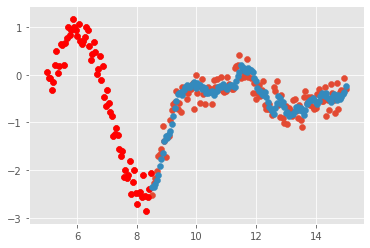

Epoch 41 batch 0 train Loss -0.2325 test Loss -0.2472 with training MSE metric 0.0732 and testing MSE metric 0.0689
learning rate is 0.0003000000142492354


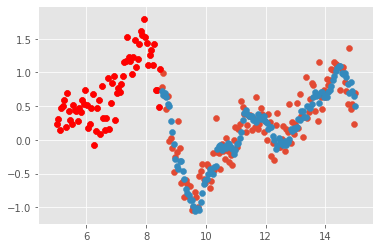

Epoch 41 batch 100 train Loss -0.2370 test Loss -0.2487 with training MSE metric 0.0718 and testing MSE metric 0.0684
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.32174301147461 secs



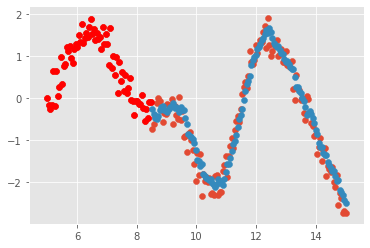

Epoch 42 batch 0 train Loss -0.2383 test Loss -0.2433 with training MSE metric 0.0715 and testing MSE metric 0.0700
learning rate is 0.0003000000142492354
Epoch 42 batch 100 train Loss -0.2641 test Loss -0.2617 with training MSE metric 0.0644 and testing MSE metric 0.0654
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.06384587287903 secs



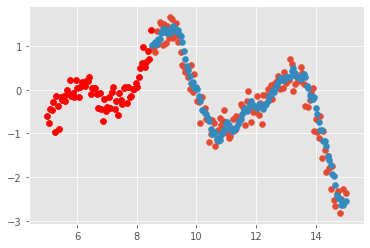

Epoch 43 batch 0 train Loss -0.2341 test Loss -0.2429 with training MSE metric 0.0727 and testing MSE metric 0.0700
learning rate is 0.0003000000142492354


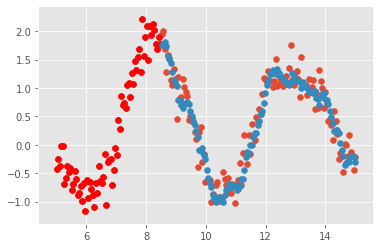

Epoch 43 batch 100 train Loss -0.2365 test Loss -0.2475 with training MSE metric 0.0720 and testing MSE metric 0.0689
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.80329203605652 secs

Epoch 44 batch 0 train Loss -0.2608 test Loss -0.2639 with training MSE metric 0.0655 and testing MSE metric 0.0644
learning rate is 0.0003000000142492354


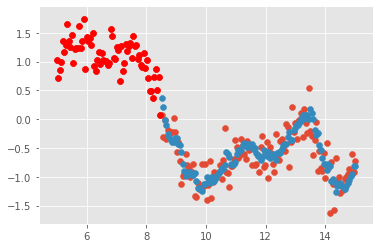

Epoch 44 batch 100 train Loss -0.2370 test Loss -0.2430 with training MSE metric 0.0719 and testing MSE metric 0.0700
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.27611327171326 secs

Epoch 45 batch 0 train Loss -0.2662 test Loss -0.2714 with training MSE metric 0.0640 and testing MSE metric 0.0626
learning rate is 0.0003000000142492354
Epoch 45 batch 100 train Loss -0.2619 test Loss -0.2761 with training MSE metric 0.0652 and testing MSE metric 0.0614
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.30507183074951 secs



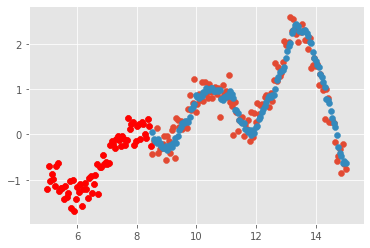

Epoch 46 batch 0 train Loss -0.2316 test Loss -0.2538 with training MSE metric 0.0734 and testing MSE metric 0.0669
learning rate is 0.0003000000142492354
Epoch 46 batch 100 train Loss -0.2584 test Loss -0.2636 with training MSE metric 0.0662 and testing MSE metric 0.0644
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.71533918380737 secs

Epoch 47 batch 0 train Loss -0.2674 test Loss -0.2712 with training MSE metric 0.0636 and testing MSE metric 0.0627
learning rate is 0.0003000000142492354


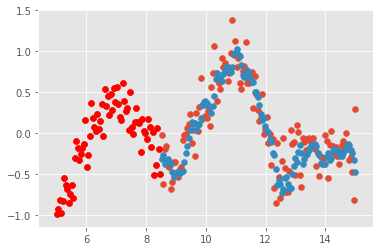

Epoch 47 batch 100 train Loss -0.1947 test Loss -0.2380 with training MSE metric 0.0837 and testing MSE metric 0.0715
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.11310410499573 secs



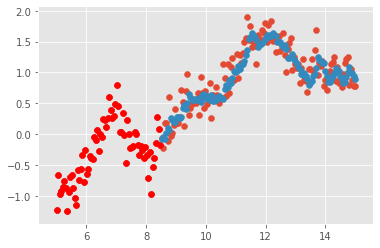

Epoch 48 batch 0 train Loss -0.2334 test Loss -0.2411 with training MSE metric 0.0729 and testing MSE metric 0.0706
learning rate is 0.0003000000142492354


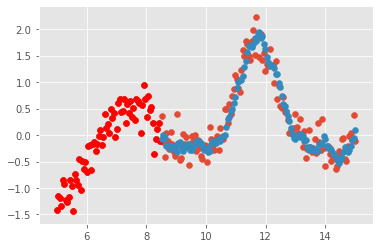

Epoch 48 batch 100 train Loss -0.2373 test Loss -0.2474 with training MSE metric 0.0717 and testing MSE metric 0.0687
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.722816944122314 secs



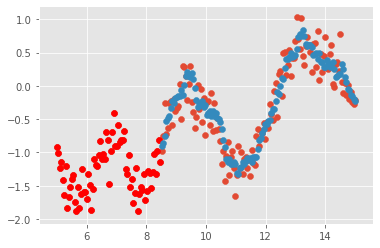

Epoch 49 batch 0 train Loss -0.2423 test Loss -0.2474 with training MSE metric 0.0704 and testing MSE metric 0.0688
learning rate is 0.0003000000142492354
Epoch 49 batch 100 train Loss -0.2634 test Loss -0.2707 with training MSE metric 0.0647 and testing MSE metric 0.0629
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.331920862197876 secs



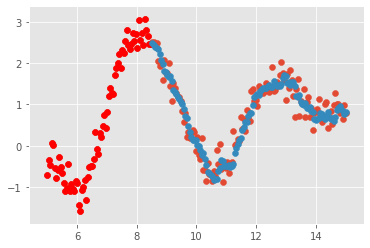

Epoch 50 batch 0 train Loss -0.2387 test Loss -0.2448 with training MSE metric 0.0712 and testing MSE metric 0.0695
learning rate is 0.0003000000142492354
Epoch 50 batch 100 train Loss -0.2600 test Loss -0.2643 with training MSE metric 0.0654 and testing MSE metric 0.0644
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.83578085899353 secs



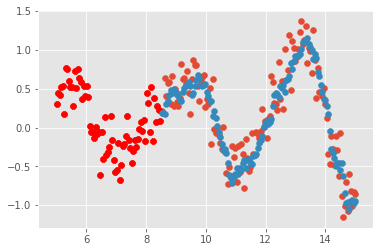

Epoch 51 batch 0 train Loss -0.2428 test Loss -0.2431 with training MSE metric 0.0703 and testing MSE metric 0.0700
learning rate is 0.0003000000142492354
Epoch 51 batch 100 train Loss -0.2688 test Loss -0.2671 with training MSE metric 0.0632 and testing MSE metric 0.0639
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 59.972376108169556 secs

Epoch 52 batch 0 train Loss -0.2590 test Loss -0.2770 with training MSE metric 0.0659 and testing MSE metric 0.0612
learning rate is 0.0003000000142492354


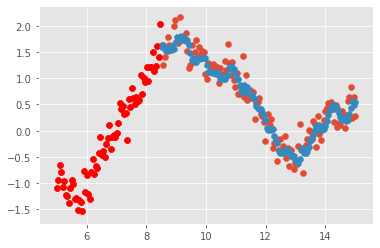

Epoch 52 batch 100 train Loss -0.2458 test Loss -0.2511 with training MSE metric 0.0693 and testing MSE metric 0.0678
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 61.11663222312927 secs



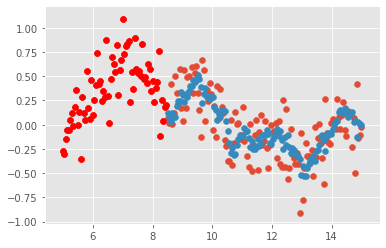

Epoch 53 batch 0 train Loss -0.2399 test Loss -0.2454 with training MSE metric 0.0711 and testing MSE metric 0.0694
learning rate is 0.0003000000142492354


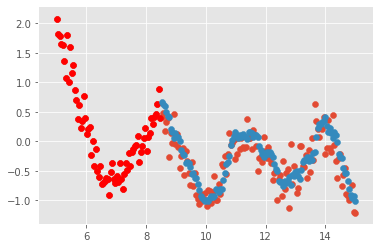

Epoch 53 batch 100 train Loss -0.2441 test Loss -0.2438 with training MSE metric 0.0698 and testing MSE metric 0.0698
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 60.09065079689026 secs

Epoch 54 batch 0 train Loss -0.2657 test Loss -0.2795 with training MSE metric 0.0640 and testing MSE metric 0.0606
learning rate is 0.0003000000142492354


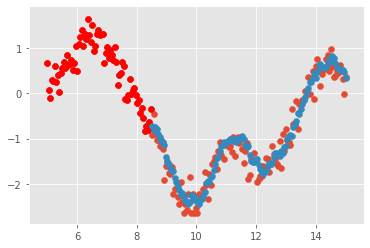

Epoch 54 batch 100 train Loss -0.2427 test Loss -0.2517 with training MSE metric 0.0702 and testing MSE metric 0.0677
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 62.99496603012085 secs

Epoch 55 batch 0 train Loss -0.2501 test Loss -0.2732 with training MSE metric 0.0683 and testing MSE metric 0.0622
learning rate is 0.0003000000142492354


KeyboardInterrupt: 

In [48]:
if __name__ == '__main__':
    step = 0
    # change to run 9 if you want to overfit
    EPOCHS = 75; batch_s  = 64; run = 10; tr_regime ='shuffle'
    l= [80, 64, 32]; heads = 32; e = 80; context = 35; c= 50
    decoder, optimizer_c, ckpt, manager, num_batches, writer, folder = helpers.pre_trained_loader(data[3], save_dir, e, l, d=d, batch_s=64, context=context, heads=1, run=run)
    with writer.as_default():
        for epoch in range(EPOCHS):
            start = time.time()
            for batch_n in range(num_batches):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    b_data, c = batch_creator.batch_regime_2d(x = data[-3], y = data[-1], em = data[2] , em_2 =  data[3], batch_s=64, context_p=50, kind='shuffle')
                    # add parameter b=20 to helpers.gather_idx if you want to overfit and comment line above
                    to_gather = helpers.gather_idx(c)
                    temp = np.zeros((b_data[0].shape[0], b_data[0].shape[1]))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=temp)
                else:
#                     b_data = batch_creator.create_batch(em_x = data[1], em_y = data[3], x = data[5], y= data[-1], batch_s=64, d=d, chnge_context=False)
                    idxs = np.random.choice(np.arange(8000), 64)
                    n = np.random.binomial(1, 0.5)
                    if (n==1): 
                        permute_idx = np.random.permutation(np.arange(200))
                    else:
                        permute_idx = np.arange(200)
                    y_tr = y[idxs, :][:, permute_idx] 
                    to_gather = helpers.gather_idx(c, l=200)
                    temp = np.zeros((64, 200))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, batch_x[:, permute_idx], y_tr, d = False, to_gather=temp)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context, heads)
                if batch_n % 100 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        b_data_te, c_te = batch_creator.batch_regime_2d(x = data[-4], y = data[-2], em = data[0] , em_2 =  data[1], batch_s=64, context_p=context, kind=tr_regime)
                        to_gather_te = helpers.gather_idx(c_te)
                        temp_te = np.zeros((b_data_te[0].shape[0], b_data_te[0].shape[1]))
                        temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=temp_te, d=True)
                        ## Plotting progress by looking at a random test case. Erase _te from the six lines below if you rather observe training

                        if to_gather_te is not None:
                            # change 64 to 20 if you are overfitting
                            idd = np.random.choice(np.arange(0, 64))
                            seq_l = to_gather_te[to_gather_te[:, 0] == idd][0, 1]
                            plt.scatter(b_data_te[1][idd, :seq_l], b_data_te[0][idd, :seq_l] , c = 'blue', label = 'context')
                            plt.scatter(b_data_te[1][idd, seq_l:], b_data_te[0][idd, seq_l:], c = 'black', label = 'observed func.', alpha=0.5)
                            plt.scatter(b_data_te[1][idd, seq_l:], pred_te[idd][(seq_l - 1):], label = 'predicted func.')
                            plt.legend()
                            plt.show()
                        else:
                            plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = b_data_te[2], y_te = b_data_te[0], em_2_te = b_data_te[3] ,pred_te = pred_te, num_context = context)
                    else:
                        idxs_te = np.random.choice(np.arange(8000, 10000), 64)
                        if (n==1): 
                            permute_idx_te = np.random.permutation(np.arange(200))
                        else:
                            permute_idx_te = np.arange(200)
                        to_gather_te = helpers.gather_idx(c, l=200)
                        temp_te = np.zeros((64, 200))
                        temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
                        y_te = y[idxs_te, :][:, permute_idx_te] 
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = batch_x[:, permute_idx_te], y_te = y_te, to_gather=temp_te, d=False)
                        
                        if (n==0):
                            fig,ax = plt.subplots()
                            ax.scatter(t, y_te[1], cmap=cmap)
                            ax.scatter(t[:70], y_te[1][:70], c='red')
                            ax.scatter(t[70:], pred_te[1, 69:]) 
                            plt.show()
                        
                        
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    if d:
                        m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
                        m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
                        print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
                        print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))
                    manager.save()
                step += 1
                ckpt.step.assign_add(1)
            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

In [54]:
from helpers import masks

In [144]:
idd = np.random.choice(np.arange(1000))

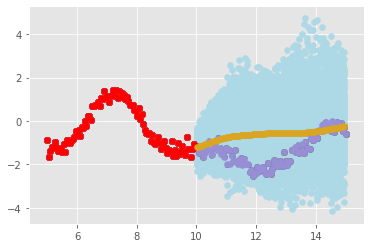

In [153]:
idd = np.random.choice(np.arange(1000))
fig,ax = plt.subplots()
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[8000 + idd, :100] 
    y_s = y_s[:-1][None, :]
    for i in range(99):
        x_s = x[:, :(100 + i), :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
    #     print((t[:(301 + i)][-1], sample_y))
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
        

    ax.scatter(t, y[8000+idd], cmap=cmap)
    ax.scatter(t[:100], y[8000+idd][:100], c='red')
    ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='lightblue') 

x = batch_x[0, :][None, :, :]
y_s = y[8000 + idd, :100] 
y_s = y_s[:-1][None, :]
for i in range(99):
    x_s = x[:, :(100 + i), :]
    _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
#     print((t[:(301 + i)][-1], sample_y))
    y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
ax.scatter(t, y[8000+idd], cmap=cmap)
ax.scatter(t[:100], y[8000+idd][:100], c='red')
ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='goldenrod') 

In [156]:
x[:, :99, :].shape

(1, 99, 80)

In [161]:
y_s.numpy()

array([[-0.8383658 , -0.6227807 , -1.1252137 , -0.7462958 , -0.4878531 ,
        -0.661256  , -0.8845227 , -0.58334965, -0.67272997, -0.9614765 ,
        -1.05763   , -1.207521  , -0.9587398 , -0.90073526, -0.9497277 ,
        -0.60751134, -0.97908336, -0.95478165, -1.3323395 , -0.9433719 ,
        -0.5966298 , -0.74621814, -1.3341026 , -0.42232022, -0.800609  ,
        -1.4460624 , -1.0498679 , -0.9903614 , -0.9897834 , -0.38197884,
        -0.4651513 , -0.77497715, -0.45981643, -0.49297252, -0.39442134,
        -0.44021064, -0.5837369 , -0.24118242, -0.38061407,  0.11325204,
         0.38787743, -0.10958096,  0.26768184,  0.09883021,  0.60849315,
         0.32071134,  0.61996984,  0.4277914 ,  0.66737634,  0.65756434,
         0.77830726,  0.58163524,  0.97329557,  0.8547472 ,  0.39792678,
         0.47246534,  0.56132054,  0.7538089 ,  0.86992955,  0.7706112 ,
         0.23906313,  0.30827406,  0.34237644,  0.14827892,  0.7130859 ,
        -0.26457757,  0.07647462, -0.7049664 , -0.3

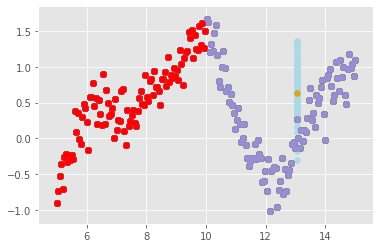

In [166]:
# get epistemic uncertainty 

idd = np.random.choice(np.arange(1000))
fig,ax = plt.subplots()
df = np.zeros((100, 2))
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[8000 + idd, :100] 
    y_s = y_s[:-1][None, :]
    x_s = np.concatenate((x[:, :99, :], x[:, 160, :].reshape(1, 1, -1)), axis =1)
    for i in range(2):
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
        df[j, i] = sample_y
        x_s = np.concatenate((x_s, x[:, 160, :].reshape(1, 1, -1)), axis =1)
        
    ax.scatter(t, y[8000+idd], cmap=cmap)
    ax.scatter(t[:100], y[8000+idd][:100], c='red')
    ax.scatter(t[160], (y_s.numpy()[:, -2]), c='lightblue') 

y_s = y[8000 + idd, :100] 
y_s = y_s[:-1][None, :]
x_s = np.concatenate((x[:, :99, :], x[:, 160, :].reshape(1, 1, -1)), axis =1)
for i in range(2):
    _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
    y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
    x_s = np.concatenate((x_s, x[:, 160, :].reshape(1, 1, -1)), axis =1)
ax.scatter(t, y[8000+idd], cmap=cmap)
ax.scatter(t[:100], y[8000+idd][:100], c='red')
ax.scatter(t[160], (y_s.numpy()[:, -2]), c='goldenrod') 

In [177]:
cov_y12 = sum((df[:, 0] - np.mean(df[:, 0])) * (df[:, 1] - np.mean(df[:, 1]))) / 100

In [178]:
var_y1 = sum((df[:, 0] - np.mean(df[:, 0]))**2) / 100

In [179]:
cov_y12 / (var_y1)

0.8414868587767466

In [182]:
t[160:163]

array([13.04020101, 13.09045226, 13.14070352])

In [184]:
t[162:159:-1]

array([13.14070352, 13.09045226, 13.04020101])

In [186]:
x[:, 162:159:-1, :].shape

(1, 3, 80)

In [196]:
x[:, 159:219:20, :].shape

(1, 3, 80)

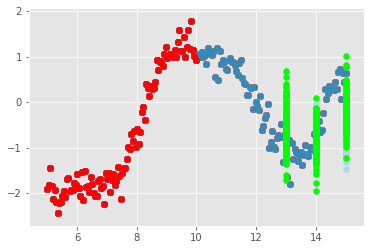

In [198]:
### FDD

idd = np.random.choice(np.arange(1000))
fig,ax = plt.subplots()
df = np.zeros((100, 2))
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[8000 + idd, :100] 
    y_s = y_s[:-1][None, :]
    x_1 = np.concatenate((x[:, :99, :], x[:, 159:219:20, :].reshape(1, 3, -1)), axis =1)
    t_1 = np.concatenate((t[:99], t[159:219:20]), axis =0)
    for i in range(3):
        x_s = x_1[:, :(100+i), :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
#         df[j, i] = sample_y
        
    ax.scatter(t, y[8000+idd], cmap=cmap)
    ax.scatter(t[:100], y[8000+idd][:100], c='red')
    ax.scatter(t_1[-3:], (y_s.numpy()[:, -3:]), c='lightblue') 
    
    
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[8000 + idd, :100] 
    y_s = y_s[:-1][None, :]
    x_1 = np.concatenate((x[:, :99, :], x[:, 199:139:-20, :].reshape(1, 3, -1)), axis =1)
    t_1 = np.concatenate((t[:99], t[159:219:20]), axis =0)
    for i in range(3):
        x_s = x_1[:, :(100+i), :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
#         df[j, i] = sample_y

    ax.scatter(t_1[-3:], (y_s.numpy()[:, -3:]), c='lime') 

# y_s = y[8000 + idd, :100] 
# y_s = y_s[:-1][None, :]
# x_s = np.concatenate((x[:, :99, :], x[:, 160, :].reshape(1, 1, -1)), axis =1)
# for i in range(2):
#     _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
#     y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
#     x_s = np.concatenate((x_s, x[:, 160, :].reshape(1, 1, -1)), axis =1)
# ax.scatter(t, y[8000+idd], cmap=cmap)
# ax.scatter(t[:100], y[8000+idd][:100], c='red')
# ax.scatter(t[160], (y_s.numpy()[:, -2]), c='goldenrod') 

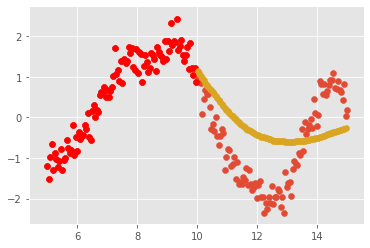

In [141]:

plt.show()

In [51]:
def evaluate(model, x, y, sample=True, d=False):

    combined_mask_x = masks.create_masks(x[:, :, 0])
    pred = model(x, y, False, combined_mask_x[:, :-1, :-1])
    if sample:
        sample_y = np.random.normal(pred[-1, 0], np.exp(pred[-1, 1]))
    else:
        sample_y = pred[-1, 0]

    return pred[:, 0], pred[:, 1], sample_y

In [36]:
batch_x.shape

(12800, 1, 80)

In [18]:
decoder.embedding_y.weights

[<tf.Variable 'decoder_2/embedding_y/embeddings:0' shape=(720, 512) dtype=float64, numpy=
 array([[-0.03918333,  0.002555  , -0.04375133, ..., -0.00895372,
          0.01428103, -0.04062321],
        [ 0.04875097,  0.00332681,  0.02075737, ..., -0.00281248,
         -0.0422142 , -0.0279823 ],
        [-0.01159028, -0.01968206, -0.00533449, ..., -0.04627387,
          0.0472882 ,  0.01146601],
        ...,
        [ 0.0485401 ,  0.0070847 ,  0.01357337, ..., -0.04143491,
         -0.02743685,  0.02866772],
        [-0.01393959, -0.03927393, -0.03441395, ..., -0.03966967,
         -0.00072969,  0.00185381],
        [ 0.01771626, -0.00915341,  0.04119668, ..., -0.04464048,
          0.04295359,  0.04671597]])>]

In [43]:
decoder.mha2.wk

In [44]:
decoder.mha.wk

### Embeddings in tensorboard

In [ ]:
helpers.tensorboard_embeddings(decoder, layer_num = 0, meta_data = np.concatenate(([0, 1], np.unique(b_data[2]))))

### Inference

att:  (1, 32, 250, 250)
unique:  tf.Tensor(
[ 41 245  40 242 243  66  65  73  67  68  71  72  83  84 174 248  45  46
  50  52  47 249  48  49  51  53  42 246 247  59  60 233  27 223   8  19
 211 212   9  38 239 240 241  35  54  55  57  58  63  56  61  62  28  29
 228 235 244  36  37  80  81  79  75  76 204  20  21  15  16  43  44 162
 163 164 159 165   6   7 201 202  17  39  33  34 234  64], shape=(86,), dtype=int32)
count:  tf.Tensor(
[2 2 4 2 2 4 2 1 2 1 2 1 1 1 1 4 4 4 7 6 2 2 7 5 6 6 5 3 3 2 2 1 2 1 1 1 1
 1 1 2 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1], shape=(86,), dtype=int32)
att:  (1, 32, 251, 251)
unique:  tf.Tensor(
[ 41 245  40 242 243  66  65  73  67  68  71  72  83  84 174  45  46 248
  50  52 249  47 250  48  51  49  53  42 246 247  59  60 233  27 223   8
  19 211 212   9  38 239 240 241  35  54  55  57  58  63  56  61  62  28
  29 228 235 244  36  37  80  81  79  75  76 204  20  21  15  16  43  44
 162 163 164 159 165 

att:  (1, 32, 264, 264)
unique:  tf.Tensor(
[173 172 168 170 171  66  68  69  70  65  23 219 220 221  13  45  46 248
  50 254  47 249  48  52 256  51 263  59  60  58  53  64  67 255 257  43
 169 174 165 166 167  74 152 153 154 155 156  54  55 258  57 260 261 262
 236 237 238  39 235  63  61  62  73  75  35  36  37  33  79  80  81  41
 245  40  42 246 162 163 164 159   0   1 200   6   7 250 251  44], shape=(88,), dtype=int32)
count:  tf.Tensor(
[1 1 1 1 1 3 2 2 2 4 1 1 1 1 1 3 3 3 5 5 1 1 1 3 3 4 3 4 4 5 2 3 2 3 4 2 1
 1 2 1 1 2 1 1 1 1 1 2 2 2 4 3 3 2 1 1 1 2 1 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(88,), dtype=int32)
att:  (1, 32, 265, 265)
unique:  tf.Tensor(
[173 172 168 170 171  66  68  69  70  74  10  11  12 205  23  45  46 248
 263 264  50 254  47 249  48  52 256  51  59  60  58  64  67  65 255  53
 257  43 169 174 165 166 152 153 154 155 156  54  55 258  57 260 261 262
 236 237 238 235  35  63  61  73  39  36  37  79  80  81  75 150  41 245
  40  42 

att:  (1, 32, 276, 276)
unique:  tf.Tensor(
[173 172 168 170 171 270 271 273 274 275  10  11  12 205  15  82  97  98
  99  88  45  46 248  50 254  52 256  51  89  96  93  64 269 265  59  60
  53 255 257  43 169 165 166 167 174  67  68  69  70  74  66  54  55 258
  48  61  62 267  83  84  77  73  78  63  58 111 112 113 105 106  75  76
  65 272  90  91  92  94 100 107 108  85 162 163 164 159 263 264  13  14
  80  81  79  41 245 242 243 244], shape=(98,), dtype=int32)
count:  tf.Tensor(
[1 1 1 1 1 3 3 3 3 2 2 2 2 1 1 3 4 4 4 4 1 1 1 2 2 1 1 2 3 3 3 2 2 2 2 2 1
 1 2 1 1 3 1 1 1 2 1 1 1 3 2 1 1 1 1 3 3 1 2 2 2 2 1 3 2 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1], shape=(98,), dtype=int32)
att:  (1, 32, 277, 277)
unique:  tf.Tensor(
[173 172 168 170 171 276 270 271 273 274  10  11  12 205  15  82  97  98
  99  88  45  46 248  50 254  52 256  51  89  96  93  64 269 265  59  60
  53 255 257  43 169 165 166 167 174  67  68  69  70  74  66  54  55 258
  48  61  62 267  83 

att:  (1, 32, 288, 288)
unique:  tf.Tensor(
[173 172 168 170 171 276 277 278 270 271  10  11  12 205  20  97  98  99
  88  82  89 100  93  94  95  52 256  50 254  51  53  79  75  76  80  81
 255 257  56 169 174 165 166  67 280 281 282  74  66  48  49 252 253  45
  61  62 267  83  84  77  78  73 286 287  96  64 273 111 112 113 110 105
 279 274  65 272  90  91  92 106 107 108  85 162 163 164 159  63 263 264
 265  58  57 260 250 251  40  43  44  87  41 245 242 243], shape=(104,), dtype=int32)
count:  tf.Tensor(
[2 1 1 1 1 2 2 2 3 3 1 1 1 1 1 4 4 3 4 2 4 2 3 2 1 2 2 1 1 2 2 2 2 2 3 3 1
 1 1 1 1 2 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1], shape=(104,), dtype=int32)
att:  (1, 32, 289, 289)
unique:  tf.Tensor(
[173 172 168 170 171 276 277 278 270 271  10  11  12 205  15  97  98  99
  88  83  89 101 102 103 104  52 256  50 254  51  53 257  79  75  76  80
  81 255  56 169 165 166 167 174  67 280 281 288 282  66

att:  (1, 32, 300, 300)
unique:  tf.Tensor(
[173 172 168 170 171 276 277 278 270 271  10  11  12 205  22  97  98  99
  87  82  89 100 101 102 103  52 256  50 254  58  88  53 257  79 297  80
  81 298  56 259  51 169 174 165 166 167  67 280 281 288  68  75  76 289
 290 291 104 269  74  83  84  77  78  73 286  96  93  66 287 273 111 112
 113 110 105 279  65 272  90  91  92  94 106 107 108 159 162 163 164 263
  63  85  86 265  59  60 266 146  54 299  41 245 242 243 244], shape=(105,), dtype=int32)
count:  tf.Tensor(
[1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 5 5 5 3 2 5 3 2 2 2 2 2 2 1 1 3 2 2 1 1 2 2
 2 1 1 1 1 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1 1 4 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1], shape=(105,), dtype=int32)
att:  (1, 32, 301, 301)
unique:  tf.Tensor(
[173 172 168 170 171 276 277 278 270 271  10  11  12 205  22  97  98  99
  87  82  89 100 101 102 103  52 256  50 254  58  88  53 257  79 297  80
  81 298  56 259  51 169 174 165 166 167  67 280 2

att:  (1, 32, 313, 313)
unique:  tf.Tensor(
[ 41 245  40 242 243 177 110 111 112 113  10  11  12 205  20  87 310 305
  97  98 312  89  93  94  95 197 191 193 194 195  88 311  53  33  34 234
 304  83  84 306 198 192 188 189  45  46 248  48  49  67 280 281 282 288
 114 115 116 119 120 100 109 101 102  90  91  92  82 302 303 307 308  85
  86  96  99  66  73 286 287 273 199 186 279 276 277 278  74  75 105 106
 107 108 159 162 163 164 165 265  63  59  60 266  54 274 270 271], shape=(106,), dtype=int32)
count:  tf.Tensor(
[2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 3 4 4 1 4 6 3 2 3 2 1 1 1 4 4 1 1 1 1 2
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2
 2 1 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1], shape=(106,), dtype=int32)
att:  (1, 32, 314, 314)
unique:  tf.Tensor(
[ 41 245  40 242 243 177 110 111 112 113  10  11  12 205  20  87 310 305
  97  98 312 313  89  93  94 197 191 193 194 195  88 311  53  33  34 234
 304  83  84 306 198 192 188 189  45  46 248

att:  (1, 32, 325, 325)
unique:  tf.Tensor(
[ 41 245  40 242 243 123 124 120 125 126  10  11  12 205  19  87 310  97
  98  99  89 312 313 314 315 197 191 193 194 195 117 118 114  22 216  17
  18 210 110 321 322 109 198 192 188 189 223 224 233  27 225 115 116 119
 199 187 105 106 107 108 319  82 302 303 307 308 111 112 113 323 324  96
  93 121 122 159 160 161 294 295 296 304  75  90  91  92 101 102 279  71
  72 284 285 320  39  64  59  60 266 265  88 311 173 179], shape=(104,), dtype=int32)
count:  tf.Tensor(
[1 1 1 1 1 2 2 3 1 1 1 1 1 1 1 2 2 4 4 4 2 2 2 2 2 3 3 2 1 1 5 2 4 1 1 1 1
 1 2 2 2 2 3 2 1 1 1 1 1 1 1 3 3 2 2 1 3 3 1 1 1 1 1 1 2 1 1 1 1 1 1 3 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(104,), dtype=int32)
att:  (1, 32, 326, 326)
unique:  tf.Tensor(
[ 41 245  40 242 243 123 124 120 125 126  19 211 212  10  11  87 310  97
  98  99  89 312 313 314 315 197 191 193 194 195 110 321 322 117  22 216
  17  18 210 118 198 192 188 189 223 224 233 225 226 114

att:  (1, 32, 337, 337)
unique:  tf.Tensor(
[173 168 172 170 171 127 131 334 332 132  73 286 287  74 294 151 152 153
 160 161 143 144 140 141 142  45  46 248  50 254 135 138 139 145 333 125
 335 136  42 246 247  40  41  24 217 218 223 224 123 119 114 115 116 154
 155 156  63  58  57 260 261 133 146 134 137 121 122 124 118 331 250 251
 159 162 163 164 157 158 336 148 149 147 150  71  72 284 285 100 317 198
 109 105  87 310 304 305  82 128 129 130 169 165 166 167], shape=(104,), dtype=int32)
count:  tf.Tensor(
[2 1 1 1 1 2 3 3 4 4 1 1 1 1 2 1 2 2 2 1 1 1 4 3 2 1 1 1 1 1 7 4 4 4 1 1 2
 4 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 3 2 3 2 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(104,), dtype=int32)
att:  (1, 32, 338, 338)
unique:  tf.Tensor(
[173 172 168 170 171 127 131 334 132 336  73 286 287 282  74 151 152 153
 160 161 143 144 140 141 142  45  46 248  50 254 135 332 145 333 124 138
 337 136 335  40  42 246 247  41 217 218  24  20  21 123

att:  (1, 32, 349, 349)
unique:  tf.Tensor(
[173 172 168 170 171 131 334 127 132 336  22 216  23 219 220 160 161 151
 152 153 143 144 140 141 142  45  46 248  52 256 174 175 159 154 155 156
 157  51 255  42 246 247 169 165 166 167  57 260 261 262  54 150 147 146
 136 340 341 137 342 135 138 139 343 344 145 346 347 348 134 339 335 332
 333 162 163 164 133 338 337 148 149  61  62 267 268 263 193 194 195 196
 198 125], shape=(92,), dtype=int32)
count:  tf.Tensor(
[5 4 4 3 2 2 2 1 2 1 1 1 1 1 1 6 4 3 2 2 1 1 2 2 2 1 1 1 1 1 2 2 3 6 4 3 2
 1 1 1 1 1 1 3 3 2 1 1 1 1 1 2 4 3 1 1 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 1 1 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(92,), dtype=int32)
att:  (1, 32, 350, 350)
unique:  tf.Tensor(
[173 172 168 170 171 131 334 127 132 336  23 219 220 221  20 160 161 152
 153 151 143 144 140 141 142  45  46 248  52 256 135 145 346 347 348 159
 154 155  42 246 247  40  51 169 174 165 166 175 167  57 260 261 262  54
 150 147 146 136 340 341 137 138 139 343 134 339 333 335 

att:  (1, 32, 361, 361)
unique:  tf.Tensor(
[173 172 168 170 171 174 177 169 162 163  22 216 217 218  20 160 161 152
 153 357 143 144 140 141 142  45  46 248  52 256 355 356 360 198 175 332
 159 154 155  42 246 247  51 255 165 166 167  57 260 261 262 257 150 350
 351 352 137 342 136 340 341 145 346 347 348 135 134 339 335 333 125 345
 147 156 157 146 133 338 337 148 149 349 164 199 197 193 194 126 132 336], shape=(90,), dtype=int32)
count:  tf.Tensor(
[6 5 4 2 2 2 1 4 2 2 1 1 1 1 1 5 4 1 1 1 1 1 3 3 3 2 2 2 2 2 3 2 2 2 3 1 4
 3 2 1 1 1 1 1 3 3 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 3 2 2 2 1 1 1 1 2 2 1 3 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(90,), dtype=int32)
att:  (1, 32, 362, 362)
unique:  tf.Tensor(
[173 172 168 170 171 174 169 177  20  21  22 216  23 152 153 357 358 160
 143 144 140 141 142  45  46 248  52 256 161 151 353 354 145 346 347 348
 138 159 361 154  42 246 247  40  41 165 175 166 167 360  54  55 258  57
 260 150 350 351 352 355 137 342 136 340 341 179 135 134 339 335 132 3

att:  (1, 32, 374, 374)
unique:  tf.Tensor(
[173 369 370 371 172 177 174 169 175  22 216  20  21  19 182 179 183 191
 188 193 194 195 196 192 197 199 145 346 347 348 127 366 160 161 362 190
 198 168 367 170 171 368 165 166 167 363 189 150 350 351 352 355 146 159
 361 181 184 152 153 357 154 155 156 157 158 187 185  66 279  71  72 284
 162 163 164 365 178 180 176 124 125 126 333 128], shape=(84,), dtype=int32)
count:  tf.Tensor(
[5 5 5 4 3 2 2 3 1 1 1 1 1 1 3 4 2 5 6 4 3 1 1 3 4 5 2 2 1 1 1 1 3 3 3 2 4
 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 5 4 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1], shape=(84,), dtype=int32)
att:  (1, 32, 375, 375)
unique:  tf.Tensor(
[173 369 370 371 172 177 374 174 175  20  21  22 216  10 179 182 183 181
 193 194 195 196 192 197 191 145 346 347 348 138 366 160 161 362 190 199
 198 169 168 367 170 171 368 165 166 167 363 188 189 150 350 351 352 154
 146 184 159 361 155 187 185  71  72 284 285 279 162 163 164 365 178 180
 124 125 126 333 131], shape=(77,

att:  (1, 32, 387, 387)
unique:  tf.Tensor(
[173 369 370 371 172 177 374 376 377  19 211 212  22 216 182 183 381 188
 189 193 194 195 196 192 197 191 179 379 333 125 126 127 332 199 198 190
 169 366 170 171 368 168 367 184 185 382 386 152 153 357 358 159 154 155
 156 157 158 384 385 187  71  72 284 285  75 160 161 362 361 150 350 351
 352 378 383 178 375 180 124], shape=(79,), dtype=int32)
count:  tf.Tensor(
[4 3 3 2 2 1 1 1 1 1 1 1 1 1 3 2 2 8 5 4 4 3 1 5 9 6 2 1 2 2 2 1 1 7 6 3 1
 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 1 1 1], shape=(79,), dtype=int32)
att:  (1, 32, 388, 388)
unique:  tf.Tensor(
[173 369 370 371 172 376 377 177 374 183  19 211 212  22 216 188 189 197
 191 182 193 194 195 196 192 179 379 333 125 126 127 199 387 198 169 366
 170 171 368 168 367 184 185 382 190 386 159 361 152 153 381 162 163 164
 365 154 155 156 157 158 384 187 385  71  72 284 285  75 160 161 362 378
 383 178 375 180 124  15  16], shape=(79,), dtype=int32)
count:

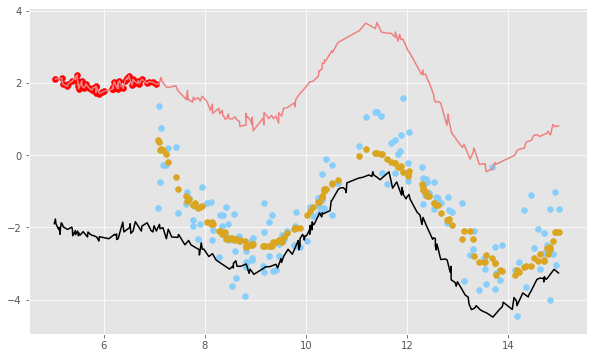

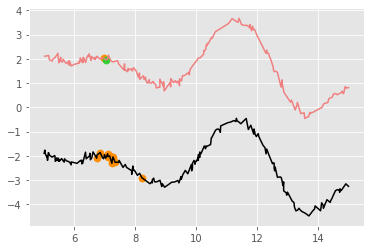

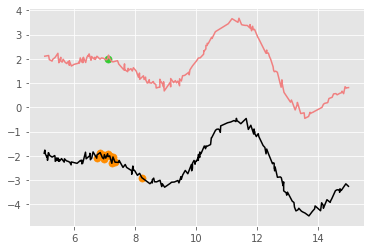

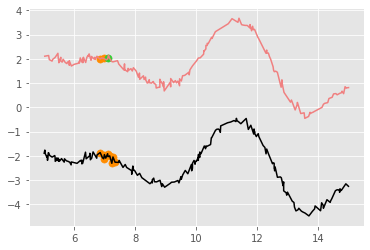

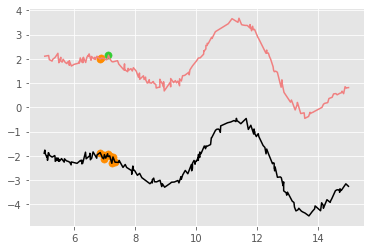

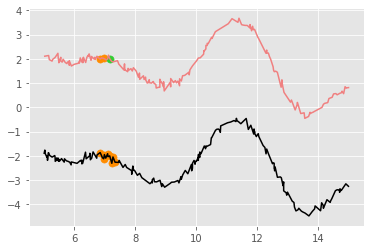

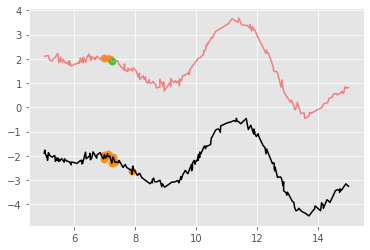

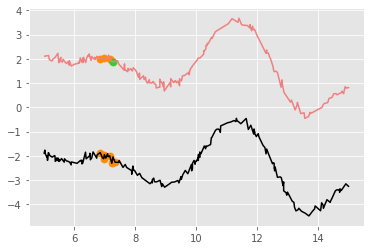

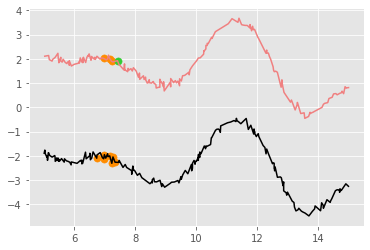

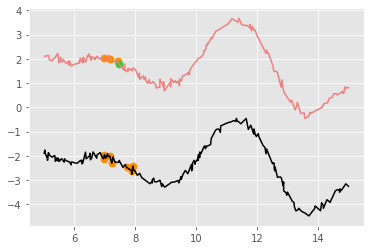

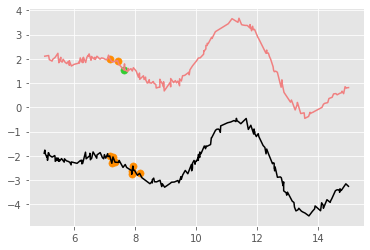

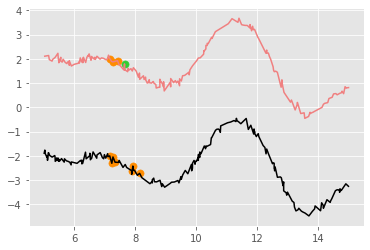

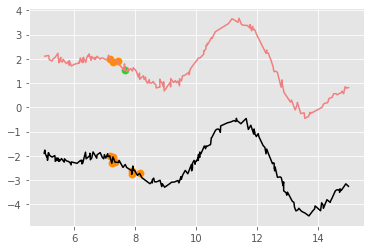

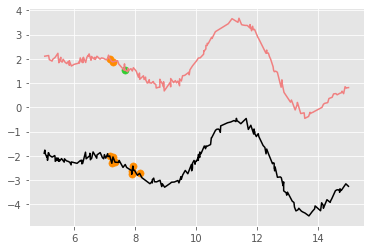

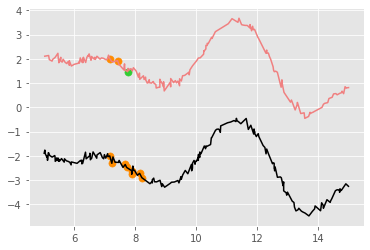

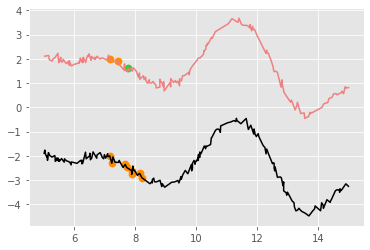

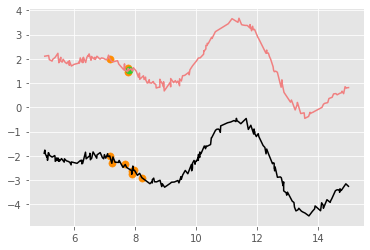

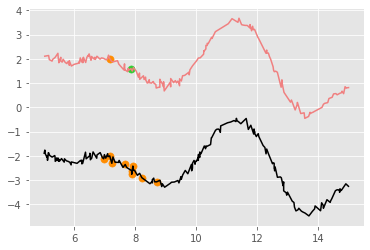

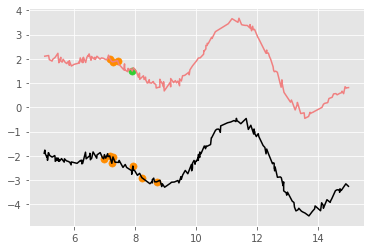

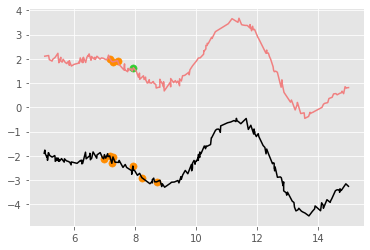

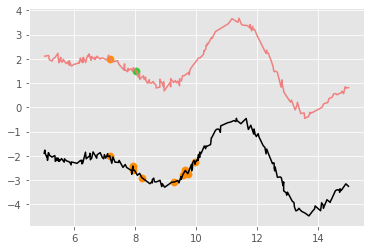

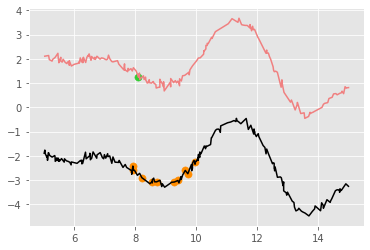

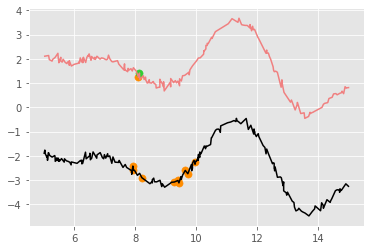

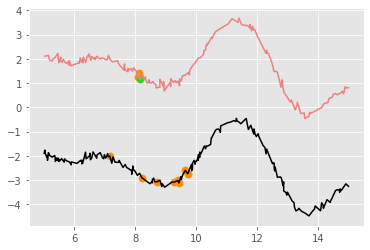

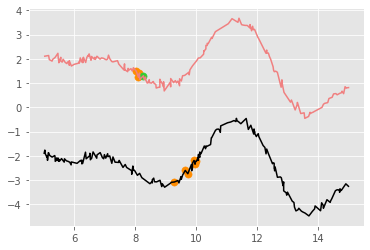

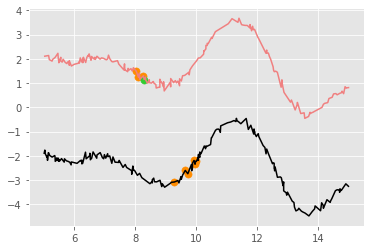

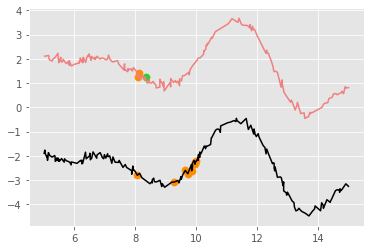

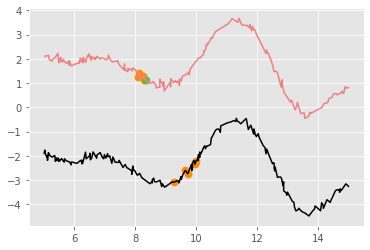

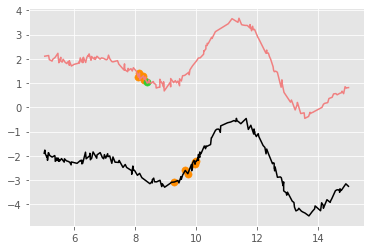

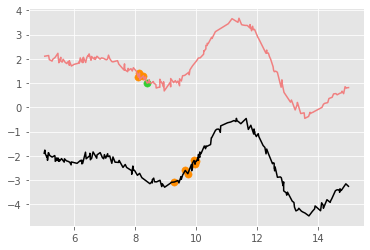

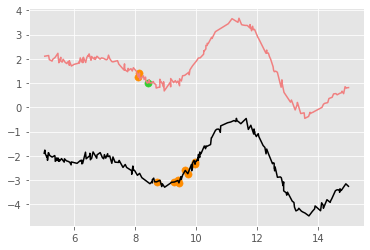

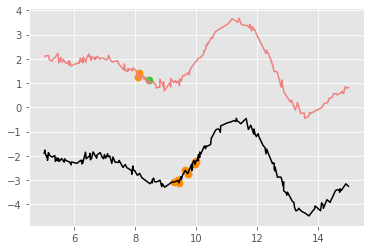

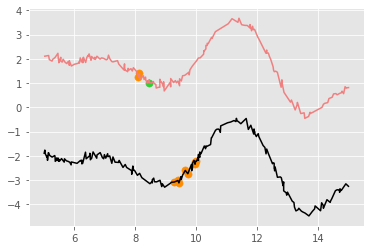

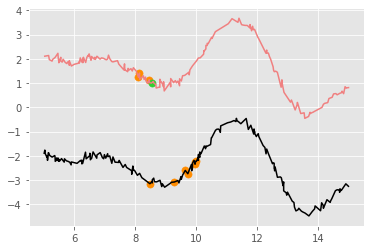

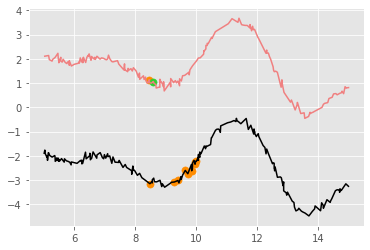

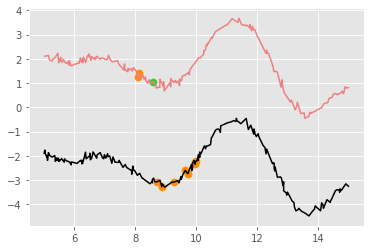

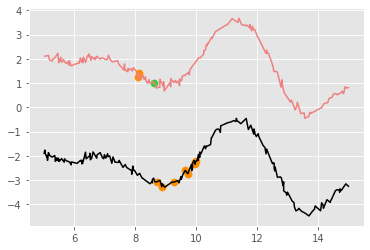

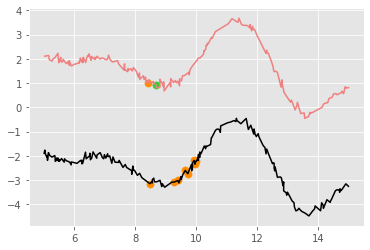

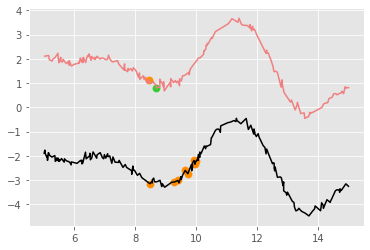

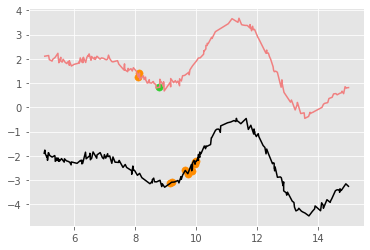

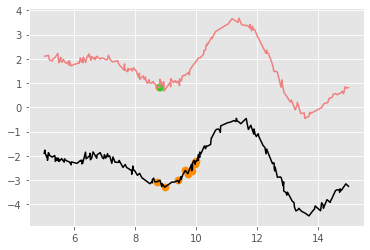

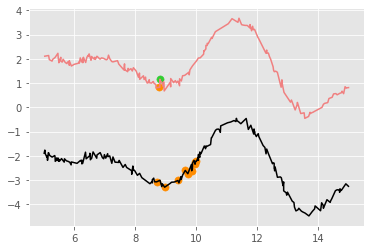

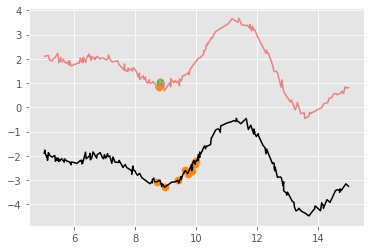

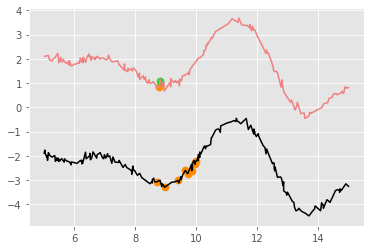

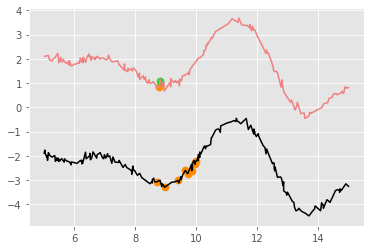

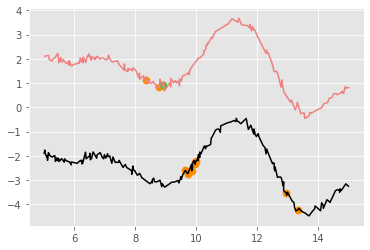

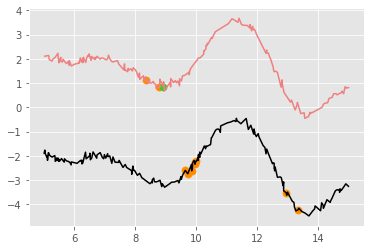

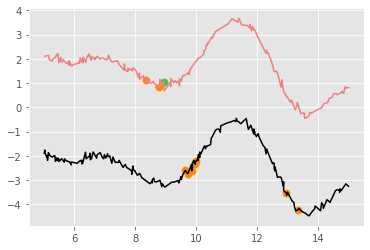

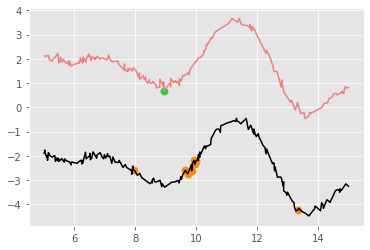

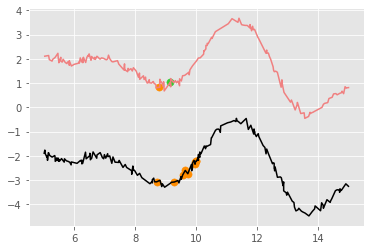

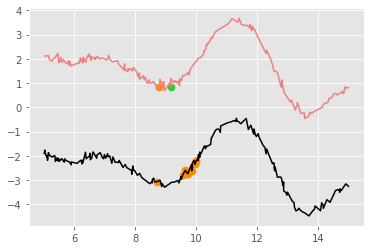

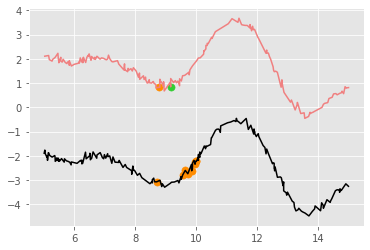

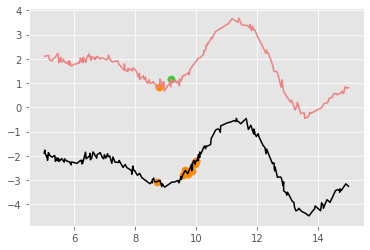

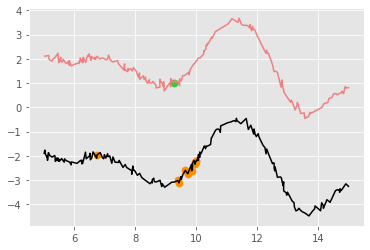

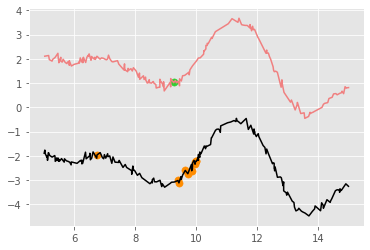

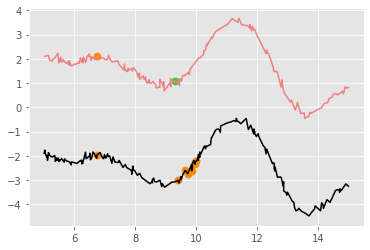

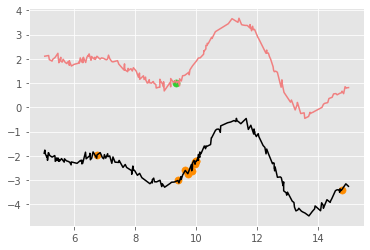

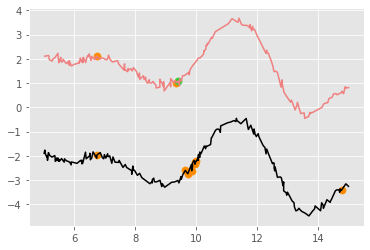

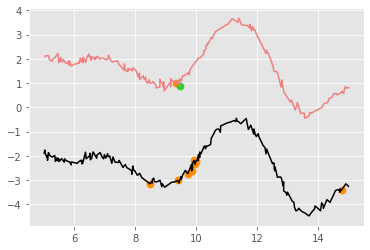

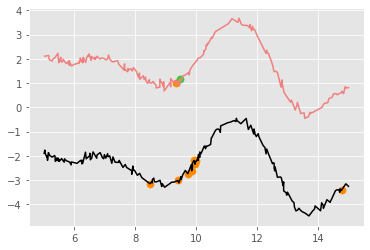

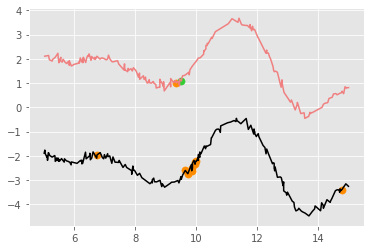

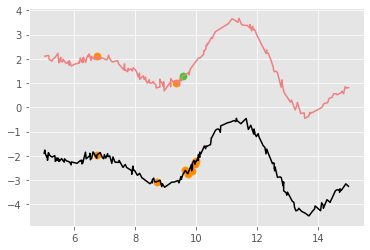

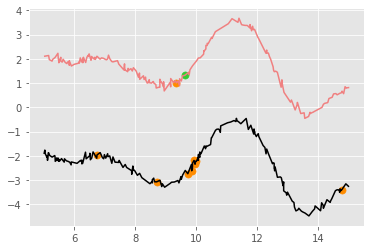

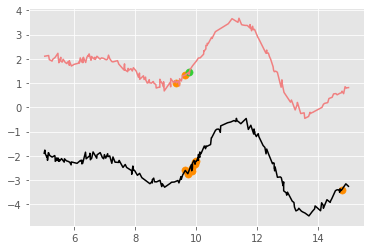

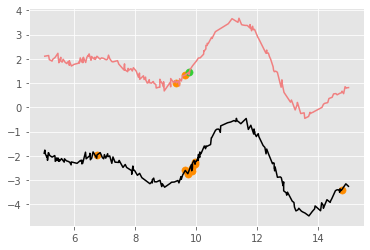

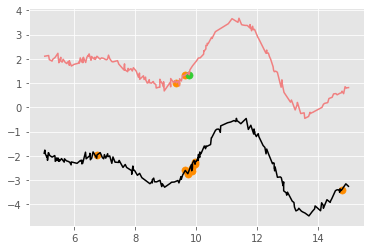

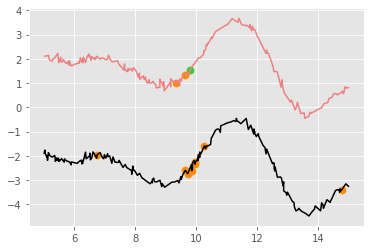

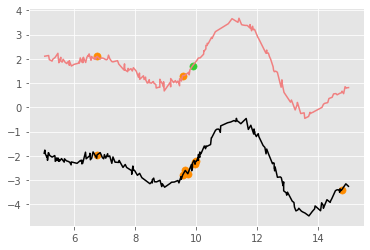

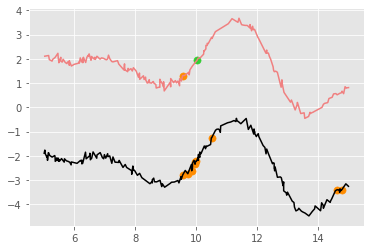

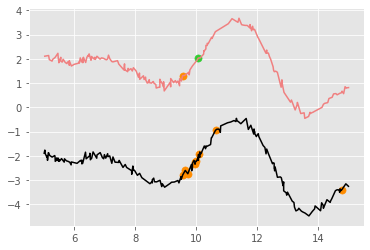

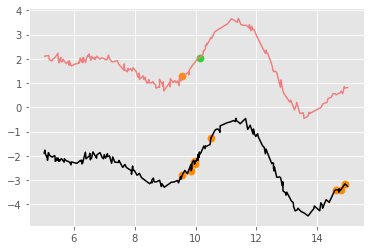

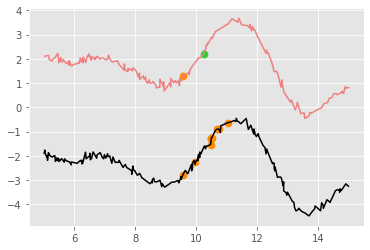

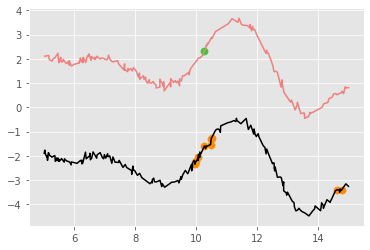

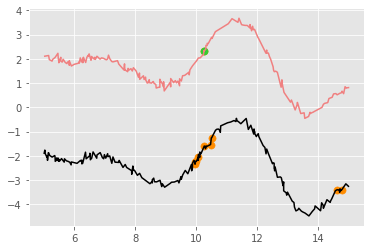

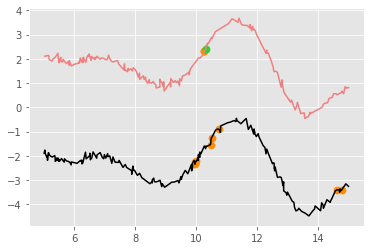

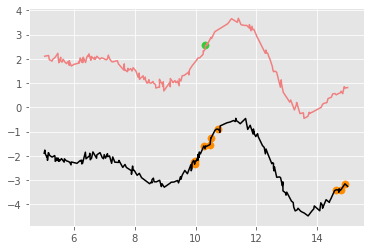

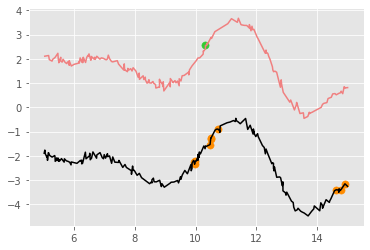

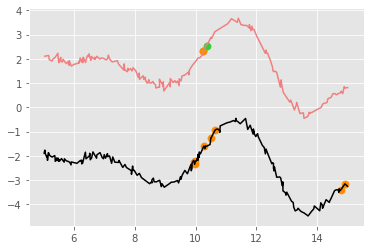

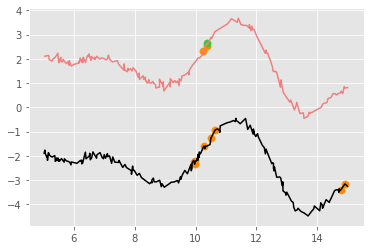

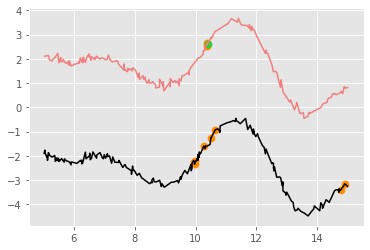

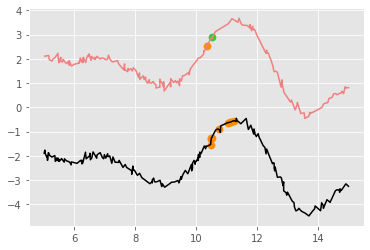

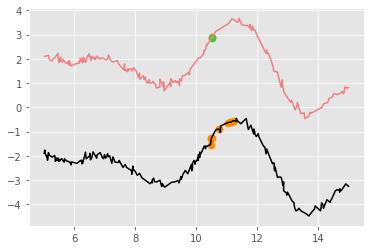

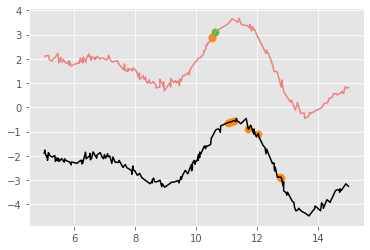

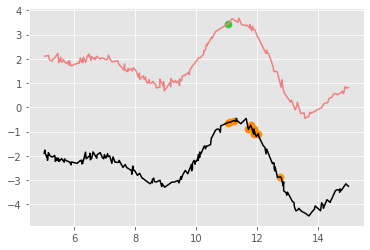

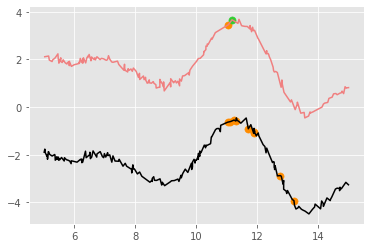

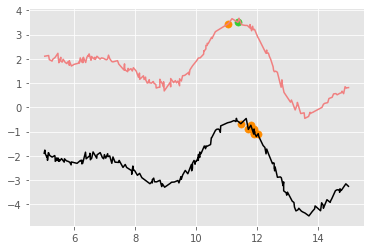

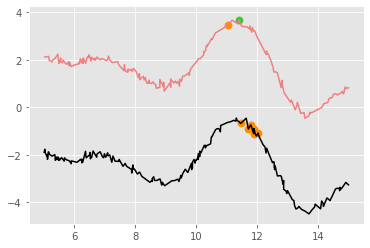

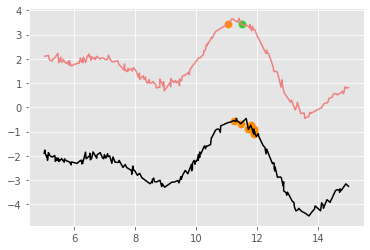

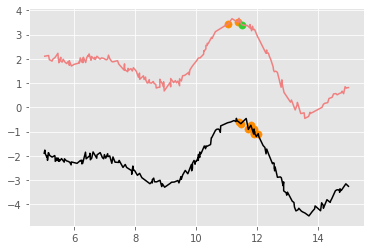

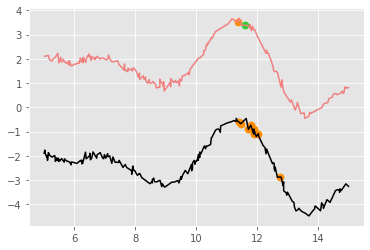

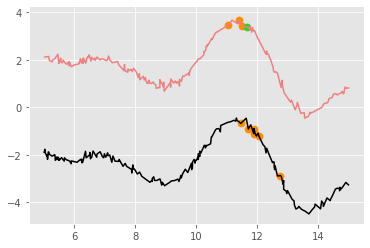

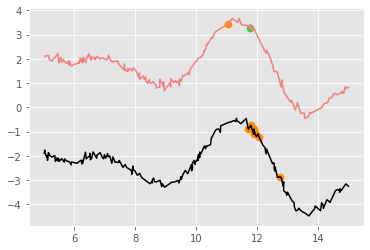

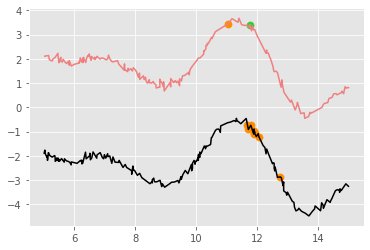

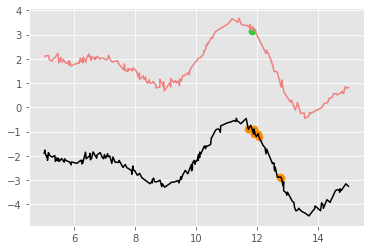

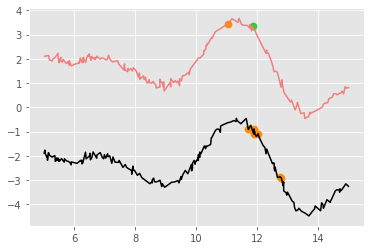

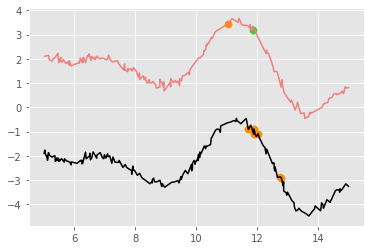

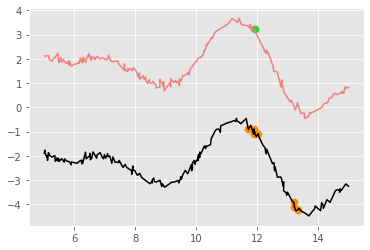

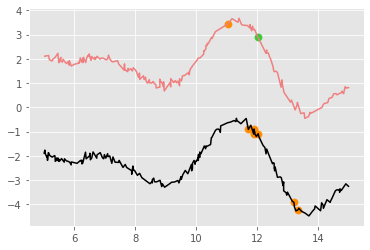

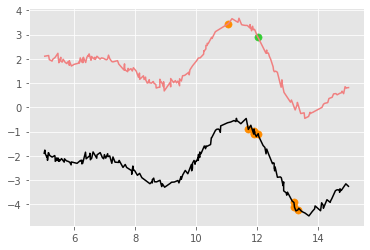

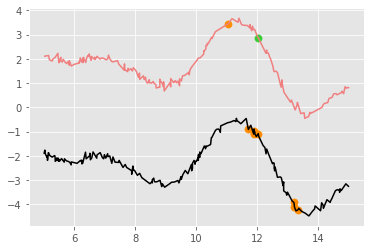

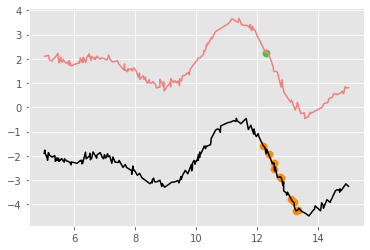

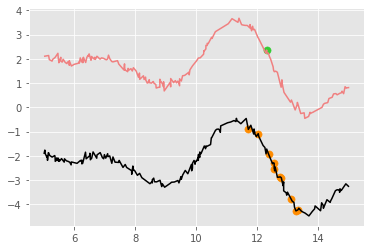

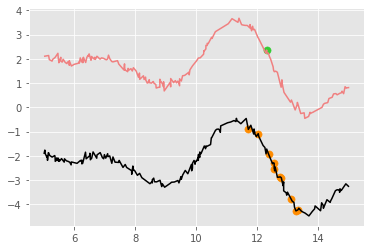

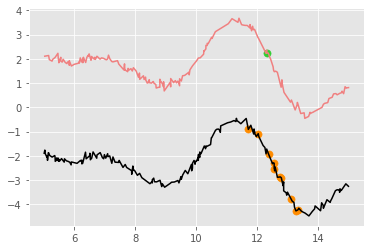

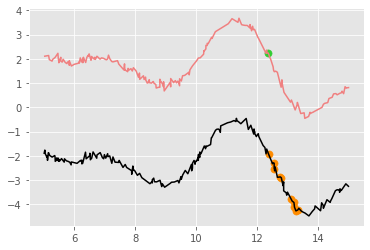

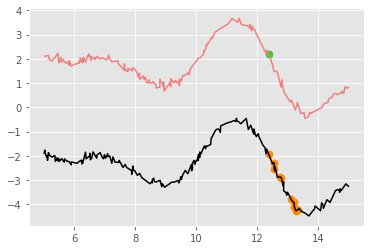

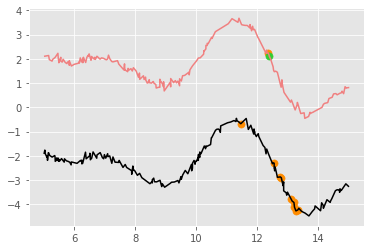

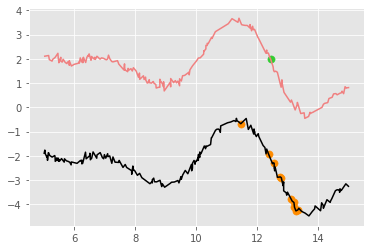

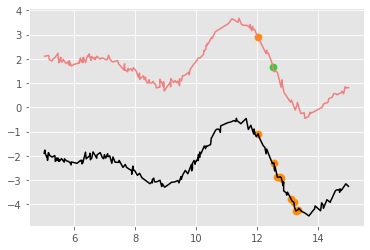

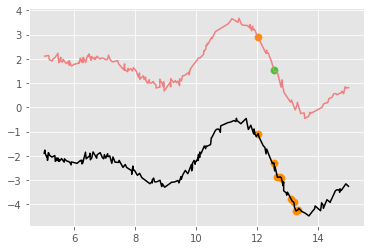

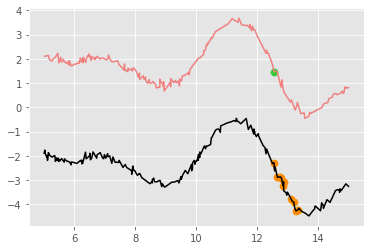

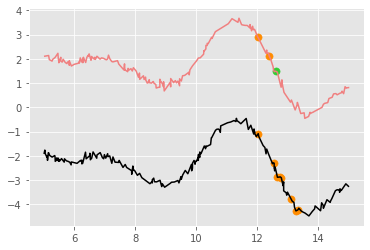

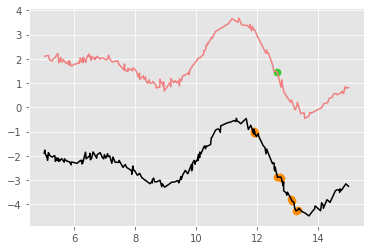

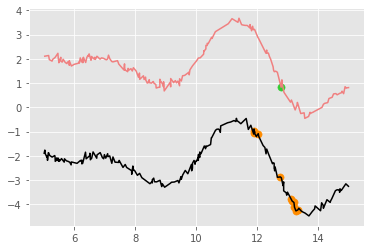

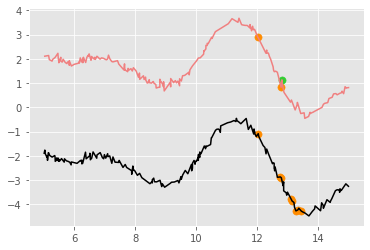

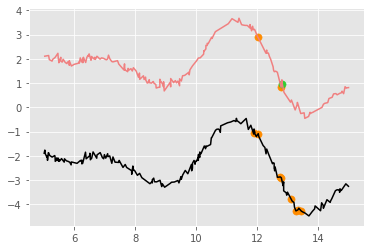

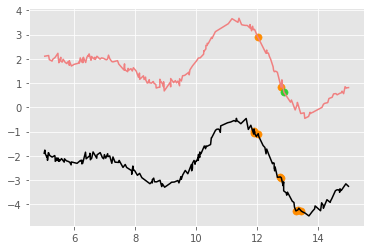

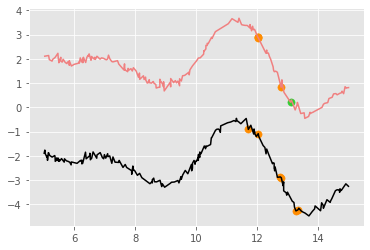

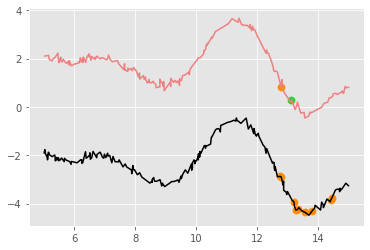

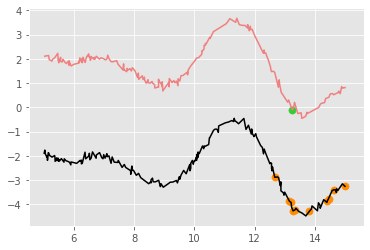

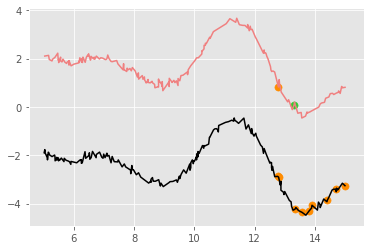

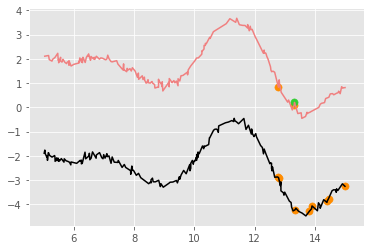

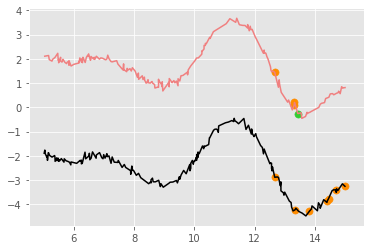

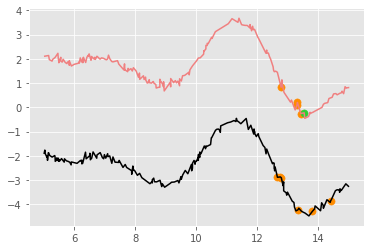

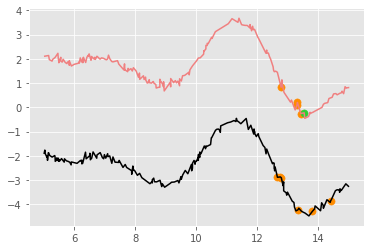

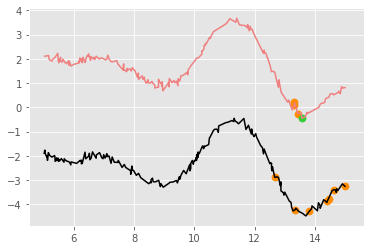

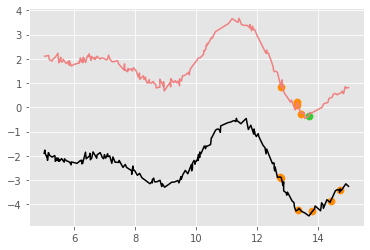

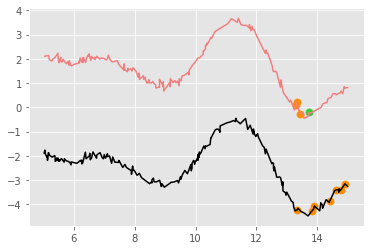

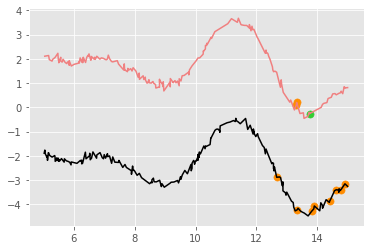

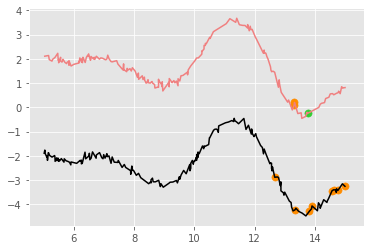

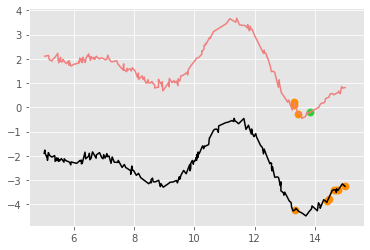

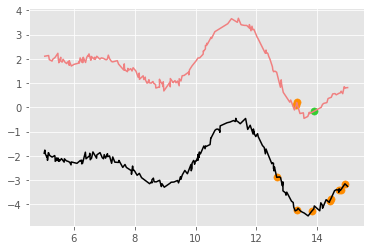

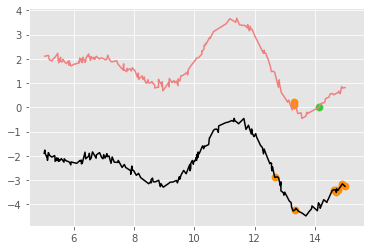

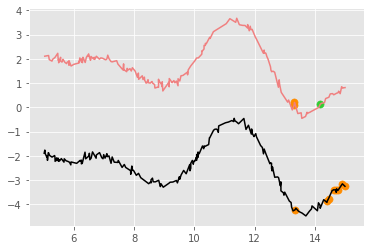

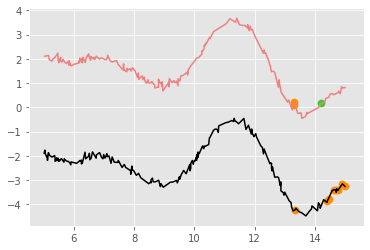

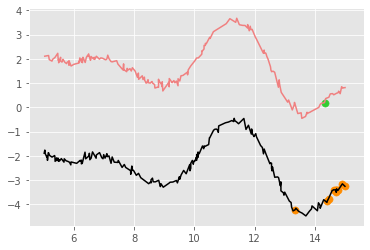

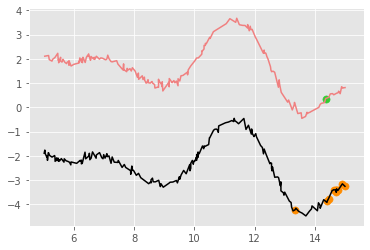

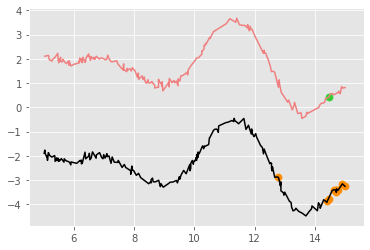

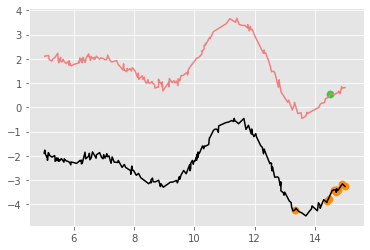

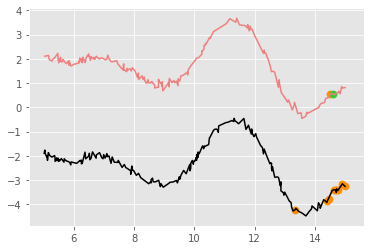

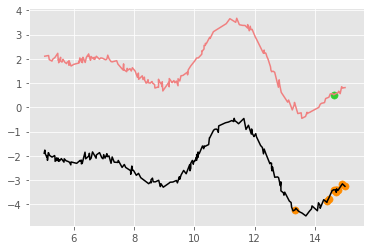

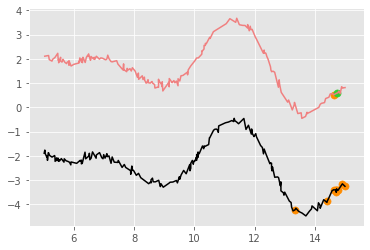

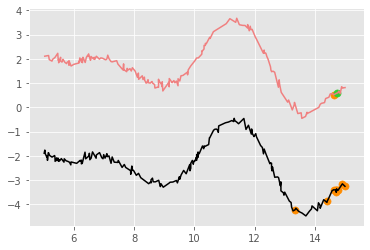

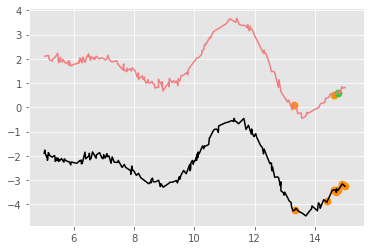

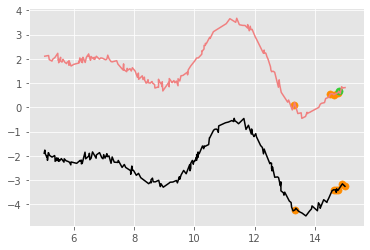

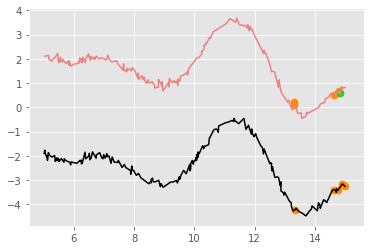

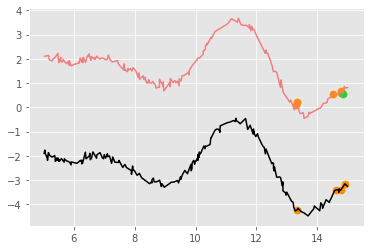

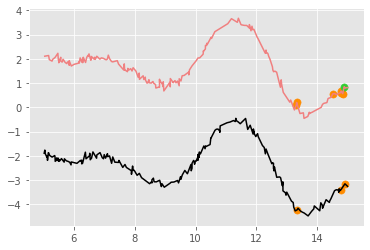

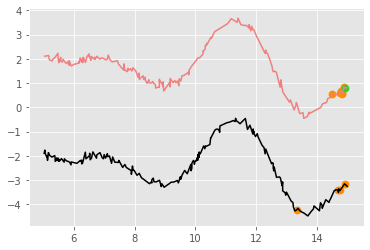

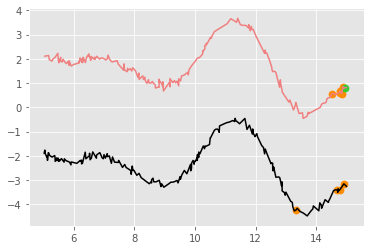

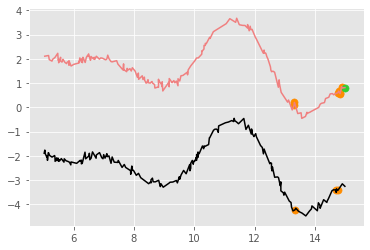

In [26]:
run = 7; l= [256, 64, 32]; e = 512; context = 50
decoder, optimizer_c, ckpt, manager, num_batches, writer, folder = helpers.pre_trained_loader(data[1], save_dir, e, l, d=True, batch_s=64, context=context, heads=1, run=run)
idx = int(np.random.choice(np.arange(0, 30000, 1), 1));
_ = plotter.infer_plot2D(decoder, data[-4][idx, :], data[-2][idx, :], data[0][idx, :], data[1][idx, :], samples = 1, num_steps = 999, consec = True, order = True, context_p = 50)

In [12]:
import pandas as pd

In [13]:
run = 6
name_comp = 'run_' + str(run)
folder = save_dir + '/ckpt/check_' + name_comp

In [15]:
df = pd.read_csv(folder + '_context_' + str(35) + '_speci.csv', header=None)

In [6]:
run =5; l= [256, 64, 32]; e = 512; context = 35
decoder, optimizer_c, ckpt, manager, num_batches, writer, folder = helpers.pre_trained_loader(data[3], save_dir, e, l, d=d, batch_s=64, context=context, heads=1, run=run)

Already exists
Restored from /Users/omernivron/Downloads/GPT_rbf/ckpt/check_run_5/ckpt-33


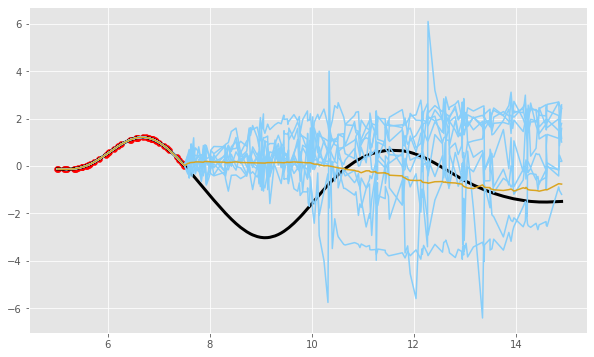

In [19]:
idx = int(np.random.choice(np.arange(0, 1000, 1), 1));
plotter.infer_plot(decoder, em = data[0][idx, :], em_y = data[2][idx, :], x = data[4][idx, :], y= data[6][idx, :], samples = 10, num_steps = 999, consec = True, order = True, context_p = 50)

In [ ]:
## Reading epistemic uncertainty
# 1. given context points predict y*(x*)
# 2. predict y**(x*) given y*(x*)
# 3. Repeat (1-->2) N times
# 4. Calculate var(y*) by 1/N *((y_i* - mean(y*))**2)
# 5. Calculate cov(y*, y**) by 1/N * ((y_i* - mean(y*)(y_i** - mean(y**))) 
# 6. Epistemic uncertainty of y* is given by 5
# 7. Aleatoric uncertainty of y* is given by (4 - 5)